<a href="https://colab.research.google.com/github/lavaman131/responsible-ai-law-ethics-society/blob/main/notebook_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![banner](https://learn.responsibly.ai/assets/banner.jpg)

https://learn.responsibly.ai

# Notebook Zero

The purpose of this notebook is to quickly recap key data science concepts and python skills that the students will need throughout the course. This notebook contains both explanations, examples and **exercises**.

If you have any questions, please post them in the `#ds` channel in Discord or join the office hours.

Reference:
- https://pandas.pydata.org
- https://seaborn.pydata.org
- https://scikit-learn.org

Let's start!

## Table of Contents

*In the end of each major section there are exercises for you to complete!*

1. **Data analysis and manipulation** - `pandas`
2. **Data visualization** - `matplotlib`, `seaborn`
3. **Machine learning: training and evaluation** - `sklearn`, `torch`
    - Binary tabular classifier - `SGDClassifier` (Logistic Regression)
    - Multiclass tabular classifier - `RandomForestClassifier`
    - Text (NLP) classifier - `SGDClassifier` (TF.IDF Logistic Regression)
    - Image classifier - `VGG11`

Uncomment and run this cell to make sure you have all required packages for this tutorial.

In [ ]:
%pip install -qqq pandas seaborn scikit-learn # torch torchvision

## Data analysis and manipulation - `pandas`

`pandas` is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real-world data analysis in Python.

In [ ]:
# Customarily, we import as follows:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
# get higher quality plots
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

To read a CSV dataset, we use `pandas`. Usually, pandas DataFrames are named `df`s.

In [ ]:
def load_wine_dataset():

    COLUMNS = ['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg',
            'Phenols', 'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int',
            'Hue', 'OD', 'Proline']


    df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
                    names=COLUMNS)


    df['Strong'] = df['Alcohol'] >= 13.5

    return df

df = load_wine_dataset()

# some preprocessing for the tasks - ignore it
df.loc[df.sample(frac=0.1, random_state=42).index, 'Flavanoids'] = np.nan

To quickly view how any object (such as a pandas datarame) looks in the memory, we can just write its name and run the cell. This is useful when beginning to explore a dataset.

In [ ]:
df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Strong
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,True
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,False
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,False
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,True
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,True
174,3,13.40,3.91,2.48,23.0,102,1.80,NaN,0.43,1.41,7.30,0.70,1.56,750,False
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,False
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,False


You can also use the `head()` and `tail()` methods to show the beggining / end of a dataframe.

In [ ]:
df.head(2)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Strong
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,True
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,False


In [ ]:
df.tail(3)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Strong
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835,False
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840,False
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560,True


To understand what is the type of each column, and check for missing values, we can use the `.info()` function.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            160 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
 14  Strong                178 non-null    bool   
dtypes: bool(1), float64(11)

To get a general "feeling" of the distributions and the magnitude of the variables in the dataset, it is usually useful to use the `describe()` function. It computes basic statistical properties of each of the variables.

In [ ]:
df.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,160.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.024687,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,1.011282,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.097500,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.865000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


We can also quickly visualize one of the columns and get a "feeling" of its distribution. We can customize the plot by using the `seaborn` library, which we demonstrate later on.

<Axes: >

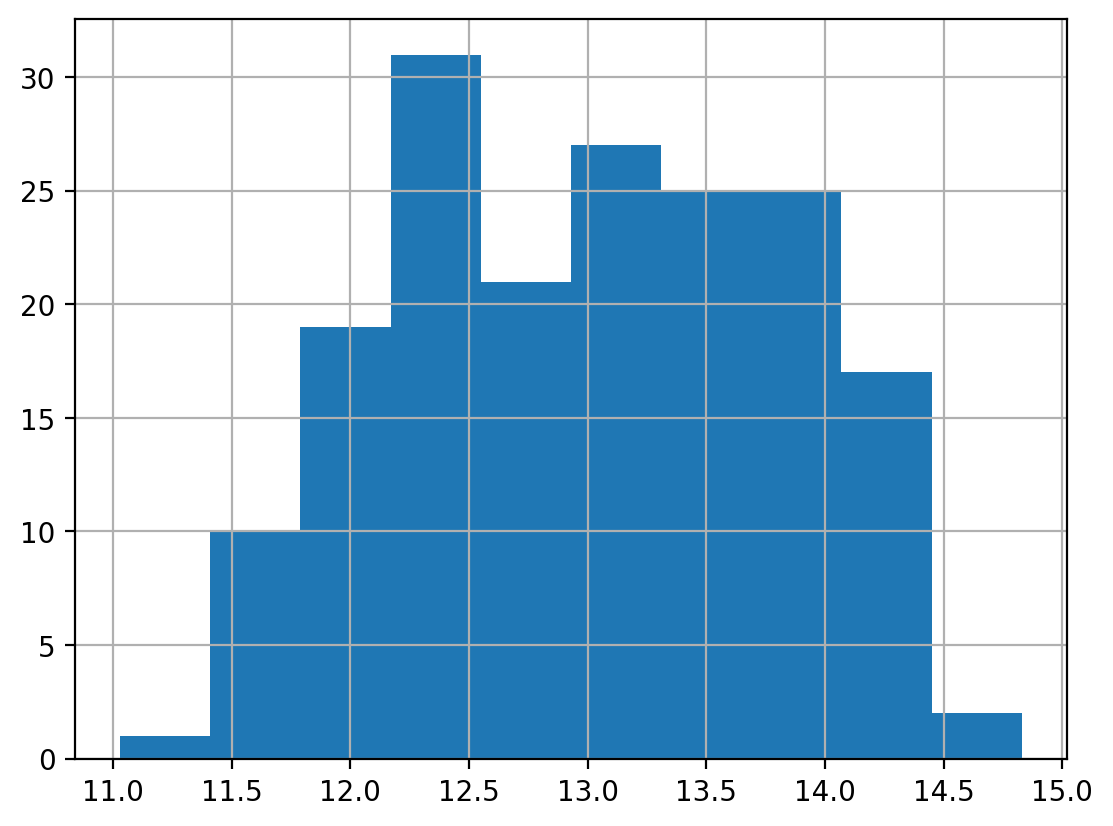

In [ ]:
df['Alcohol'].hist()

To check correlation between each two variables, we can use the `corr()` function. Later, we will show how to visualize this information using the `seaborn` library.

In [ ]:
df.corr()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Strong
Wine,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.844577,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717,-0.396944
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.235511,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,0.786463
Malic.acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.424002,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,-0.022070
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.099148,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,0.223530
Acl,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.357454,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,-0.268696
Mg,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.179692,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,0.247490
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.860026,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,0.362121
Flavanoids,-0.844577,0.235511,-0.424002,0.099148,-0.357454,0.179692,0.860026,1.000000,-0.529767,0.650238,-0.185163,0.539311,0.805468,0.486039,0.312793
Nonflavanoid.phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.529767,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,-0.204304
Proanth,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.650238,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,0.212423


If we want to remove certain columns, for example when they are not useful, we can use the `drop()` function. Notice that if we want our actual dataframe to update, we need to re-assign it `df = df.drop()`.

In [ ]:
columns_to_drop = ['Nonflavanoid.phenols', 'Proanth']
df.drop(columns=columns_to_drop)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Color.int,Hue,OD,Proline,Strong
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,5.64,1.04,3.92,1065,True
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,4.38,1.05,3.40,1050,False
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,5.68,1.03,3.17,1185,False
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,7.80,0.86,3.45,1480,True
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,4.32,1.04,2.93,735,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,7.70,0.64,1.74,740,True
174,3,13.40,3.91,2.48,23.0,102,1.80,NaN,7.30,0.70,1.56,750,False
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,10.20,0.59,1.56,835,False
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,9.30,0.60,1.62,840,False


Drop missing data by using `dropna()`. If some row includes a `NaN` value, it is dropped from the dataframe.

In [ ]:
df.dropna()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Strong
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,True
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,False
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,False
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,True
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660,True
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,True
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,False
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,False


Alternatively, we can fill the `NaN` values with a predefined value by using the `fillna(value)` function.

In [ ]:
df.fillna('Hello there')

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Strong
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,True
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,False
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,False
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,True
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,True
174,3,13.40,3.91,2.48,23.0,102,1.80,Hello there,0.43,1.41,7.30,0.70,1.56,750,False
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,False
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,False


Selecting a part of a dataset can be useful when we want to split the data, or look at a specific subset of it. To select a range of rows, we simply use slicing like in Python.

Sample a fraction / absolute amount of the data `sample()`.

In [ ]:
df.sample(2)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Strong
130,3,12.86,1.35,2.32,18.0,122,1.51,1.25,0.21,0.94,4.1,0.76,1.29,630,False
112,2,11.76,2.68,2.92,20.0,103,1.75,2.03,0.60,1.05,3.8,1.23,2.50,607,False


In [ ]:
df.sample(frac=0.02)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Strong
167,3,12.82,3.37,2.30,19.5,88,1.48,0.66,0.40,0.97,10.26,0.72,1.75,685,False
82,2,12.08,1.13,2.51,24.0,78,2.00,NaN,0.40,1.40,2.20,1.31,2.72,630,False
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,True
144,3,12.25,3.88,2.20,18.5,112,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855,False


To select a subset of rows by index, we can pass a slice object inside a sqaure brackets. For example, if we want to select the 2-nd to the 5-th (excluding), we execute:

In [ ]:
df[2:5]

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Strong
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,False
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,True
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,False


Slice objects are even more complex, and we can skip every 10th index, by passing a third "step" parameter.

In [ ]:
df[:50:10]

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Strong
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,True
10,1,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510,True
20,1,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780,True
30,1,13.73,1.50,2.70,22.5,101,3.00,NaN,0.29,2.38,5.70,1.19,2.71,1285,True
40,1,13.56,1.71,2.31,16.2,117,3.15,3.29,0.34,2.34,6.13,0.95,3.38,795,True


We can also project the df and select a subset of columns, expressed with a list.

In [ ]:
the_columns_we_care_about = ['Wine', 'Alcohol', 'Flavanoids']
df[the_columns_we_care_about]

,Wine,Alcohol,Flavanoids
0,1,14.23,3.06
1,1,13.20,2.76
2,1,13.16,3.24
3,1,14.37,3.49
4,1,13.24,2.69
...,...,...,...
173,3,13.71,0.61
174,3,13.40,NaN
175,3,13.27,0.69
176,3,13.17,0.68


We can select a subset of the data that satisfies a certain condition, for example:

In [ ]:
df[df['Wine'] == 2]

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Strong
59,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520,False
60,2,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680,False
61,2,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450,False
62,2,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630,True
63,2,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2,12.07,2.16,2.17,21.0,85,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378,False
126,2,12.43,1.53,2.29,21.5,86,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352,False
127,2,11.79,2.13,2.78,28.5,92,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466,False
128,2,12.37,1.63,2.30,24.5,88,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342,False


We can also combine selection, projection and computing statistics.

In [ ]:
df[df['Alcohol'] > 10]['Mg'].mean()

99.74157303370787

To select a subset of the data and compute statistics on it, we use the `.groupby()` function, followed by an aggregation function, such as `mean()`.

In [ ]:
df.groupby('Wine').mean()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Strong
Wine,,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.994038,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864,0.711864
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.094844,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042,0.028169
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.777045,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833,0.270833


Another useful aggregation function is `size()`, which returns the number of rows in each group.

In [ ]:
df.groupby('Wine').size()

Wine
1    59
2    71
3    48
dtype: int64

We can also groupby multiple columns as the key, by passing a list of columns as the groupby parameter.

In [ ]:
df.groupby(['Wine', 'Strong']).mean()

Alcohol  Malic.acid       Ash        Acl          Mg   Phenols  \
Wine Strong                                                                     
1    False   13.178824    2.209412  2.468235  17.488235  101.588235  2.645882   
     True    13.973810    1.930238  2.450476  16.854762  108.261905  2.918810   
2    False   12.235652    1.948696  2.243333  20.201449   94.681159  2.251159   
     True    13.765000    1.380000  2.295000  21.500000   90.000000  2.525000   
3    False   12.911429    3.220571  2.414857  21.200000  100.457143  1.675143   
     True    13.806154    3.638462  2.496923  22.000000   96.230769  1.688462   

             Flavanoids  Nonflavanoid.phenols   Proanth  Color.int       Hue  \
Wine Strong                                                                    
1    False     2.758750              0.297647  1.755294   4.686471  1.031765   
     True      3.098611              0.286905  1.957619   5.869048  1.074286   
2    False     2.087419              0.366522  1.639855   3.072029  1.049362   
     True      2.325000              0.265000  1.300000   3.590000  1.295000   
3    False     0.805312              0.444000  1.126857   7.240571  0.674571   
     True      0.701667              0.456923  1.225385   7.815385  0.704615   

                   OD      Proline  
Wine Strong                         
1    False   3.081765  1000.588235  
     True    3.188571  1162.309524  
2    False   2.784638   519.492754  
     True    2.810000   520.000000  
3    False   1.667714   645.285714  
     True    1.726154   588.461538

An quick an elegant to `groupby(col).size()` is to use `value_counts()`. There are two useful parameters for it:
* `subset=['col1', 'col2']` that restricts the groupby operation to a specific column(s).
* `normalize=True/False` that returns proportions rather than frequencies.

In this example, we count how many examples we have from each type of wine.

In [ ]:
df.value_counts(subset=['Wine', 'Strong'])

Wine  Strong
2     False     69
1     True      42
3     False     35
1     False     17
3     True      13
2     True       2
dtype: int64

Or alternatively, the proportion of each wine in the dataset.

In [ ]:
df.value_counts('Wine', normalize=True)

Wine
2    0.398876
1    0.331461
3    0.269663
dtype: float64

### <mark>Exercises #1</mark>

<mark>Exercise 1.1</mark>

Fill all `NaN` values with your first name.

In [ ]:
df.fillna("Alex")

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Strong
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,True
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,False
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,False
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,True
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,True
174,3,13.40,3.91,2.48,23.0,102,1.80,Alex,0.43,1.41,7.30,0.70,1.56,750,False
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,False
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,False


<mark>Exercise 1.2</mark>

Print the correlation between **Proline** and **Alcohol**.

In [ ]:
df[["Proline", "Alcohol"]].corr()

,Proline,Alcohol
Proline,1.00000,0.64372
Alcohol,0.64372,1.00000


<mark>Exercise 1.3</mark>

Sample 20% out of the **Wine**s of type **1**.

In [ ]:
df.loc[df.Wine == 1].sample(frac=0.2)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Strong
54,1,13.74,1.67,2.25,16.4,118,2.60,2.90,0.21,1.62,5.85,0.92,3.20,1060,True
58,1,13.72,1.43,2.50,16.7,108,3.40,3.67,0.19,2.04,6.80,0.89,2.87,1285,True
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,True
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,False
52,1,13.82,1.75,2.42,14.0,111,3.88,3.74,0.32,1.87,7.05,1.01,3.26,1190,True
48,1,14.10,2.02,2.40,18.8,103,2.75,2.92,0.32,2.38,6.20,1.07,2.75,1060,True
40,1,13.56,1.71,2.31,16.2,117,3.15,3.29,0.34,2.34,6.13,0.95,3.38,795,True
39,1,14.22,3.99,2.51,13.2,128,3.00,3.04,0.20,2.08,5.10,0.89,3.53,760,True
15,1,13.63,1.81,2.70,17.2,112,2.85,NaN,0.30,1.46,7.30,1.28,2.88,1310,True
31,1,13.58,1.66,2.36,19.1,106,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515,True


<mark>Exercise 1.4</mark>

Compute the proportion of **Strong** wines (`'Strong'=True`).

In [ ]:
# df.value_counts(subset=['Strong'], normalize=True)
df.loc[df.Strong].shape[0] / df.shape[0]

0.3202247191011236

<mark>Exercise 1.5</mark>

Compute the `max()` **Mg**, for each **Wine** type and for each **Strength** (for both `'Strong'=True` and `'Strong'=False`).

In [ ]:
df.groupby(["Wine", "Strong"])["Mg"].max()

Wine  Strong
1     False     124
      True      132
2     False     162
      True       94
3     False     122
      True      123
Name: Mg, dtype: int64

## Data visualization - `matplotlib`, `seaborn`

`matplotlib` is a library for creating static, animated, and interactive visualizations in Python.

`seaborn` is a Python data visualization library based on `matplotlib` (behind the scenes, `seaborn` uses `matplotlib` to draw its plots). It integrates closely with `pandas` data structures and provides a high-level interface for drawing attractive and informative statistical graphics.

By convention, seaborn is imported with the shorthand `sns`.

In [ ]:
import seaborn as sns; sns.set()

From now on, we will review some basic work with `seaborn`, and demonstrate the creation of different plots.

An categorzied overview of the different plots appears below.

![image](https://seaborn.pydata.org/_images/function_overview_8_0.png)

### Univariate, distribution plots (`displot`)

To plot a univariate histogram, we use the axis-level function `histplot()`.

[Text(0.5, 1.0, 'Histogram of Alcohol')]

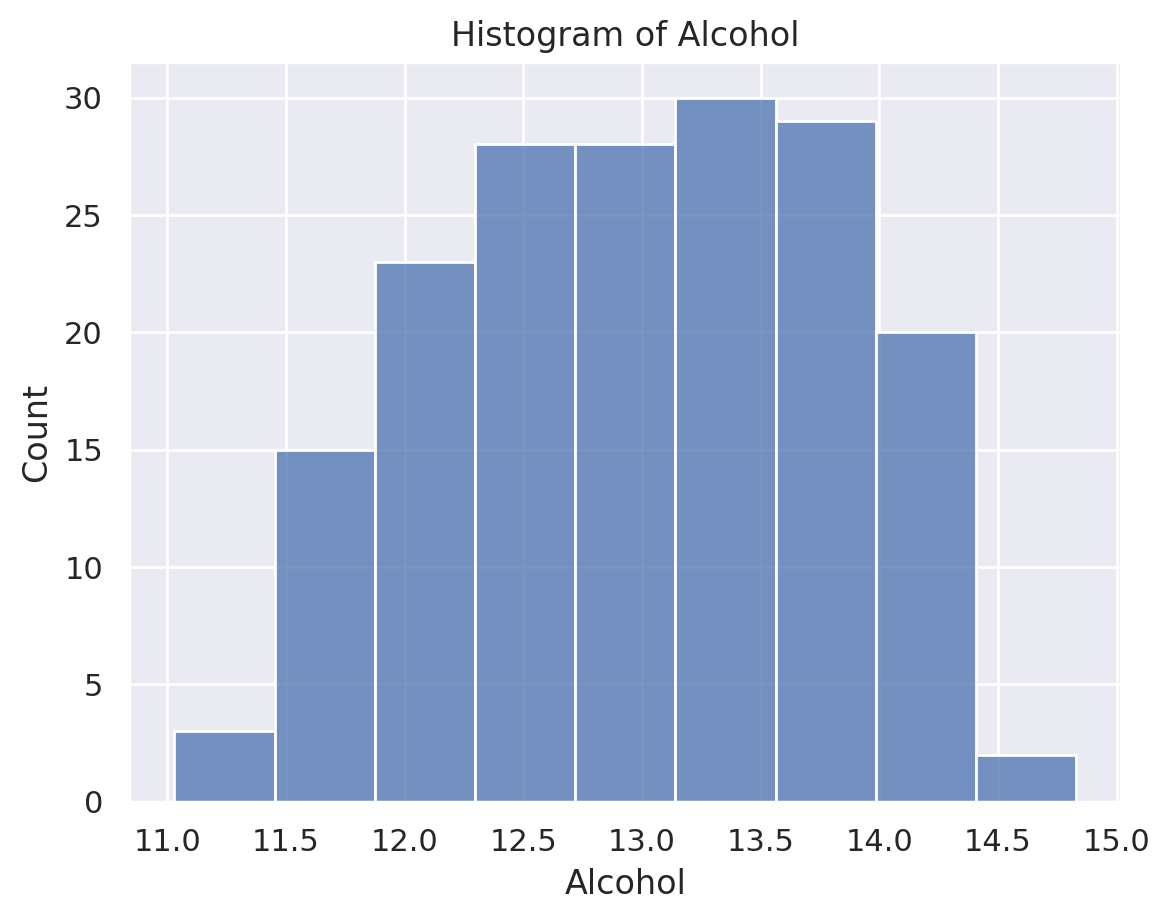

In [ ]:
sns.histplot(data=df, x="Alcohol").set(title='Histogram of Alcohol')

We can also draw fancier distribution plots, by using the figure-level interface `displot`.

* The `col` parameter performs a groupby operation on the passed column.
* The `kde` parameter controls the continuous density line.

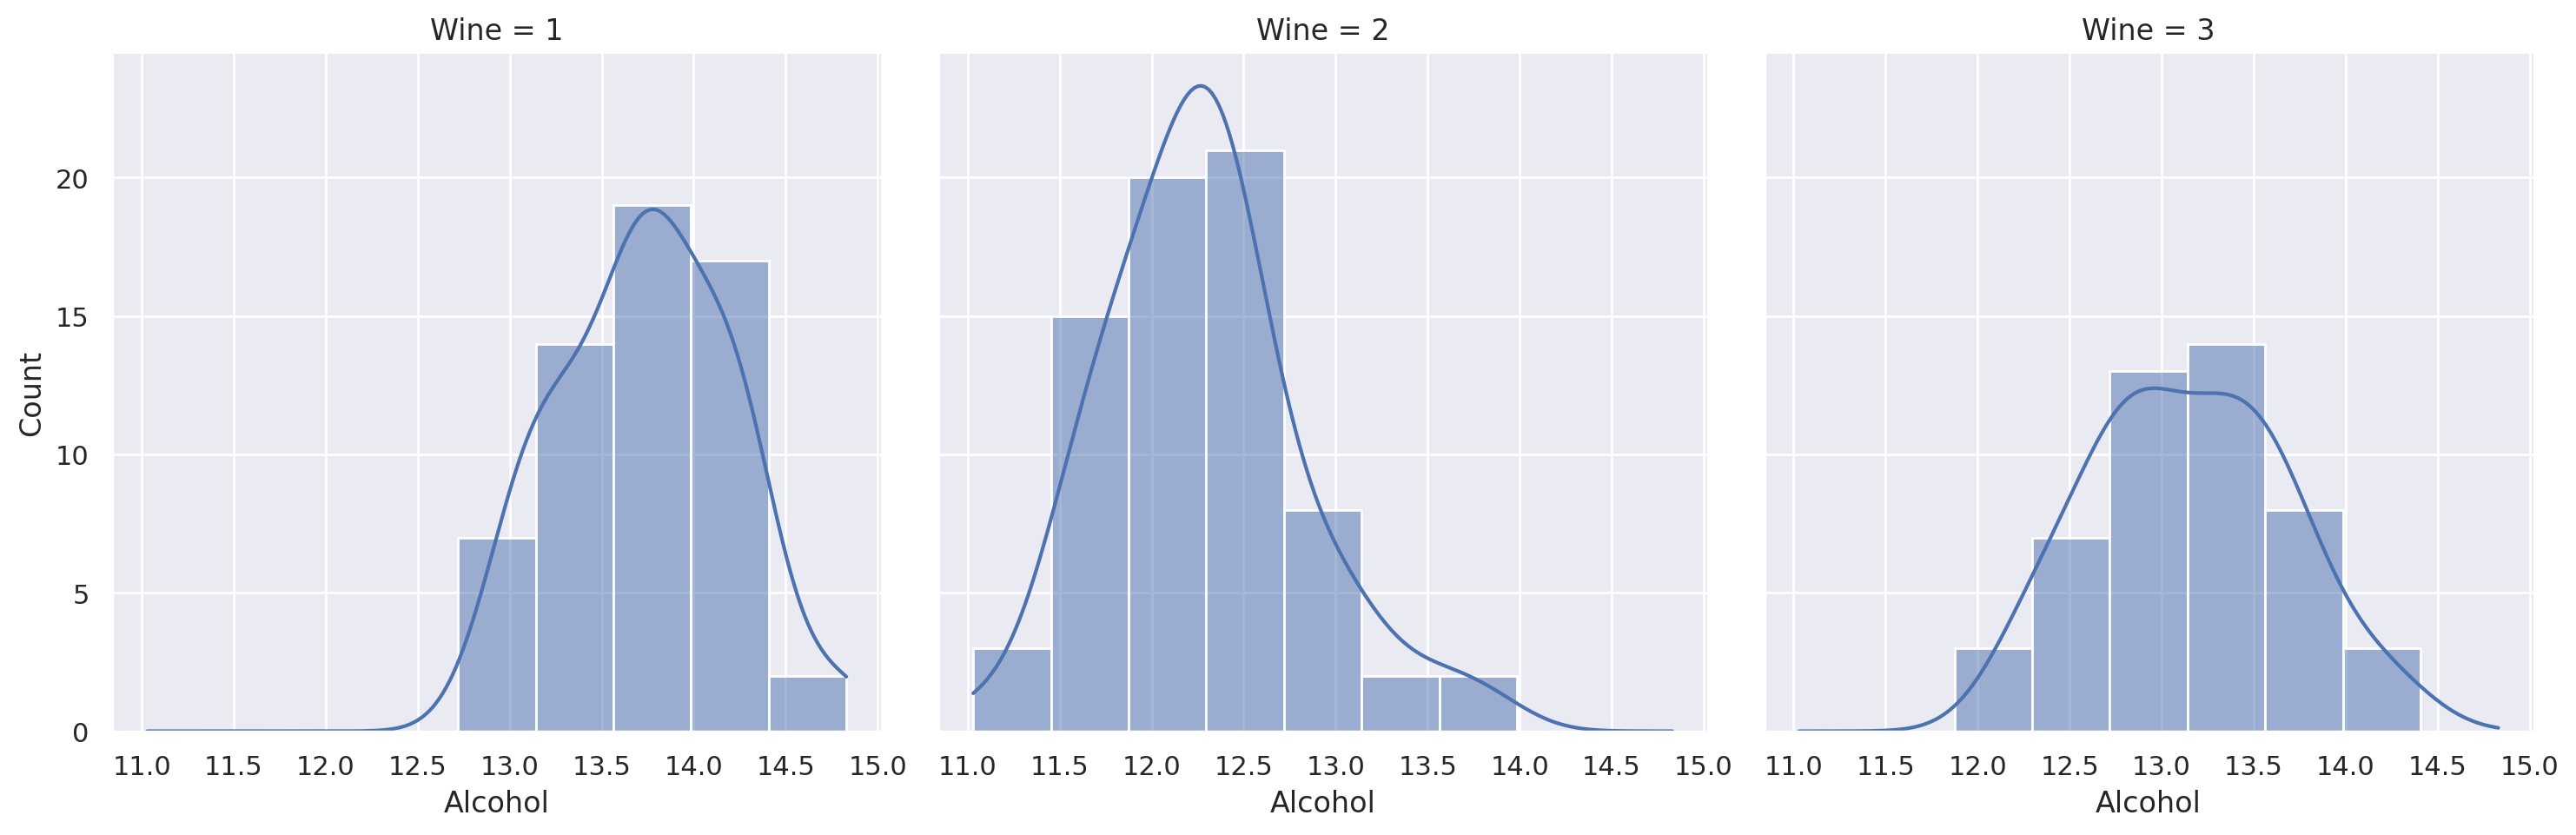

In [ ]:
sns.displot(data=df, x="Alcohol", col="Wine", kde=True)

### Categorical plots (`catplot`)

To draw a box plot to show distributions with respect to categories, we use the `sns.boxplot()`.

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

Further reading in [Wikipedia](https://en.wikipedia.org/wiki/Box_plot).

[Text(0.5, 1.0, 'Box plot of the Mg rate')]

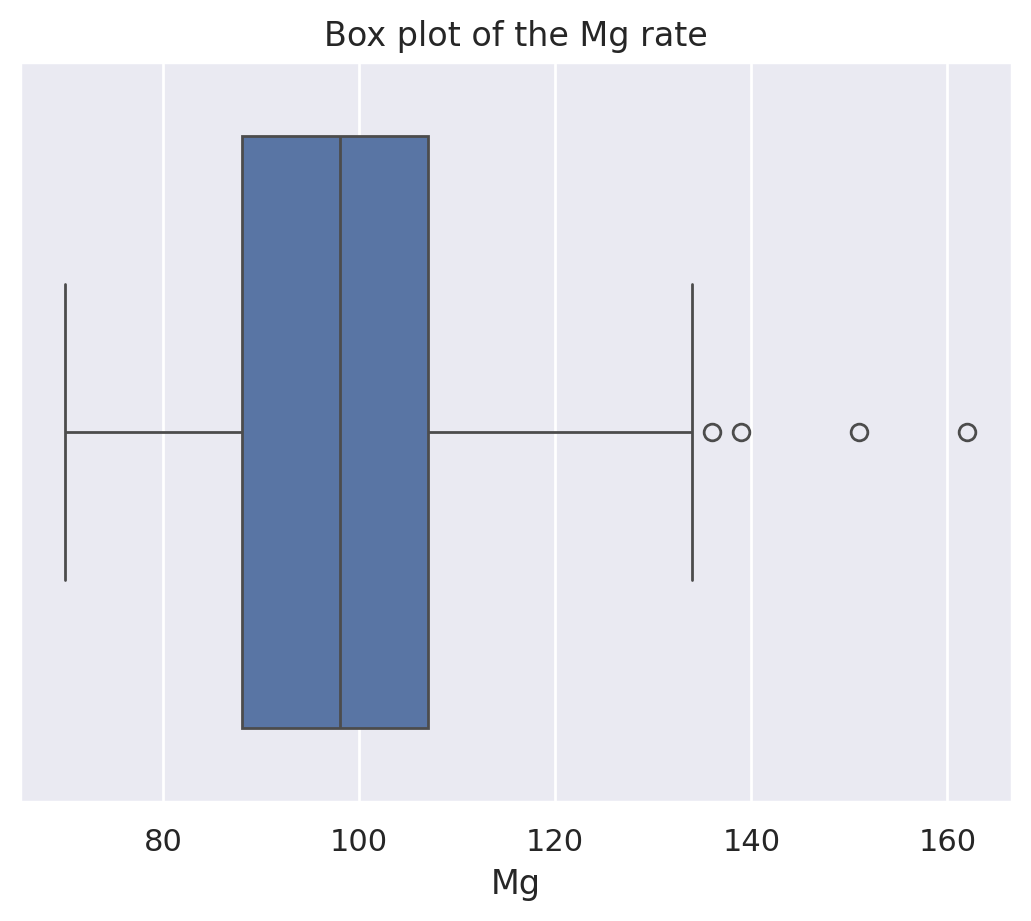

In [ ]:
sns.boxplot(data=df, x='Mg').set(title='Box plot of the Mg rate')

To draw a scatter plot where one variable is categorical, we use the `sns.stripplot()`.

[Text(0.5, 1.0, 'Strip plot for Alcohol, for each Wine type')]

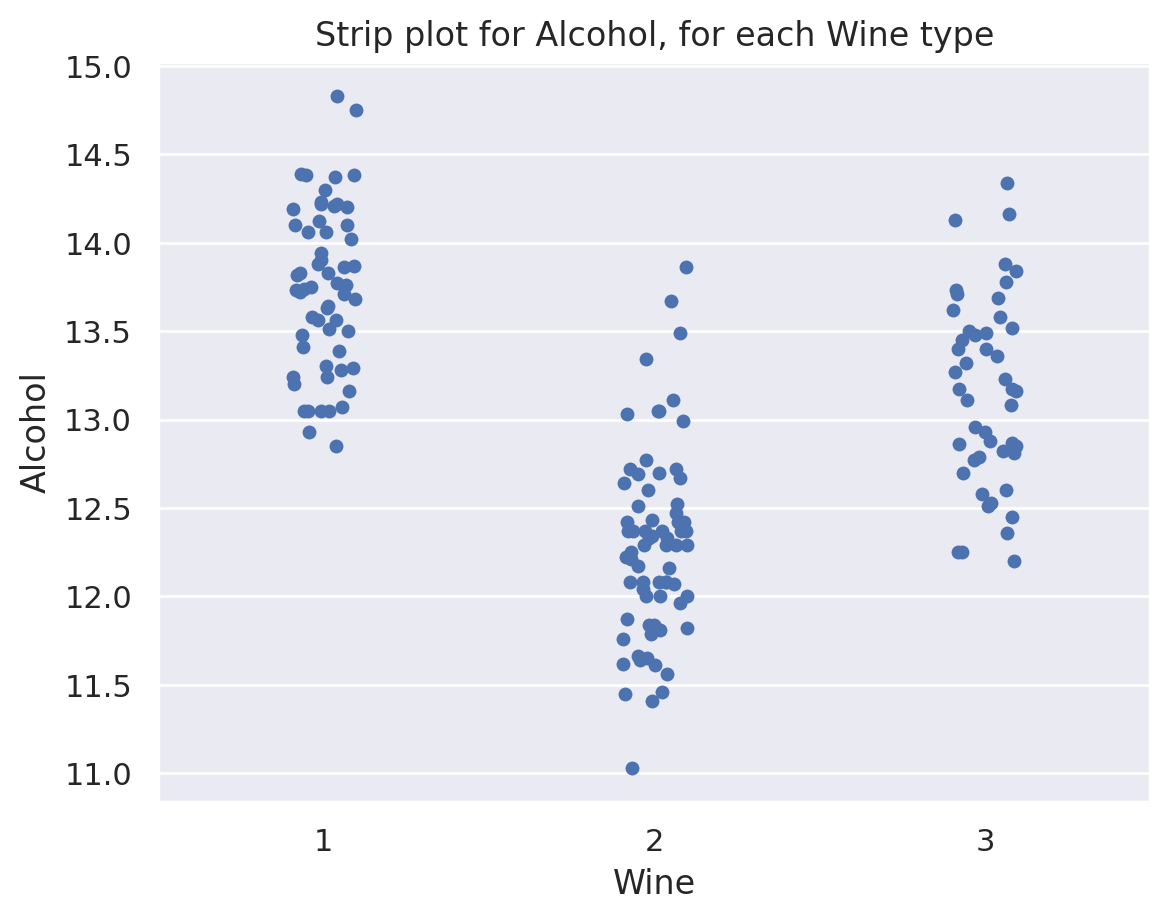

In [ ]:
sns.stripplot(data=df, x="Wine", y="Alcohol").set(title='Strip plot for Alcohol, for each Wine type')

We can also draw fancier categorical plots, by using the figure-level interface `catplot`.

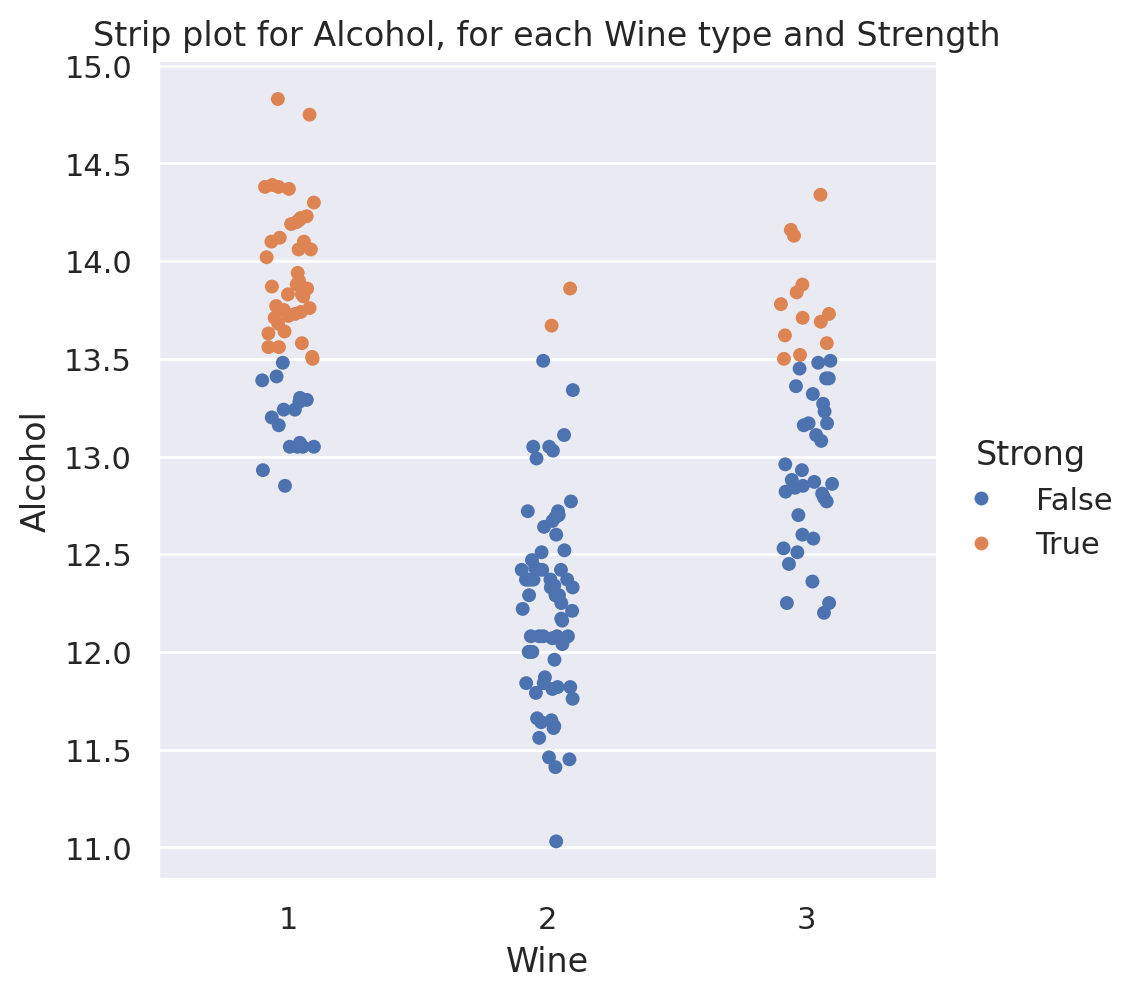

In [ ]:
sns.catplot(data=df, x="Wine", y="Alcohol", hue="Strong").set(
    title='Strip plot for Alcohol, for each Wine type and Strength')

### Relational plots (`relplot`)

To visualize data when both variables are continuous, we use `sns.scatterplot()`.

[Text(0.5, 1.0, 'Scatter plot of Alcohol vs. Proline')]

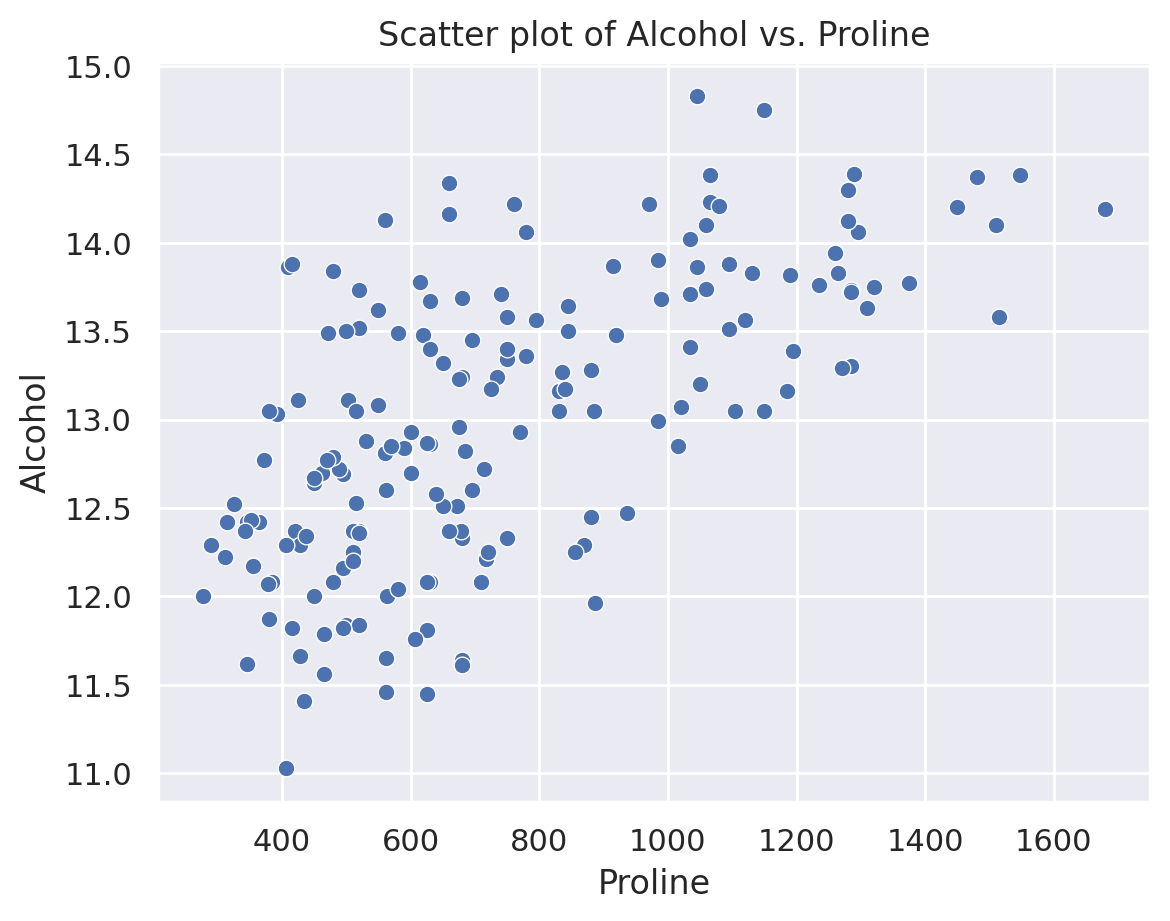

In [ ]:
sns.scatterplot(data=df, x="Proline", y="Alcohol").set(title='Scatter plot of Alcohol vs. Proline')

We can draw even fancier plots by coloring and changing the marker style of categorical variables.

[Text(0.5, 1.0, 'Scatter plot of Alcohol vs. Proline,\nincluding Wine type and Strength')]

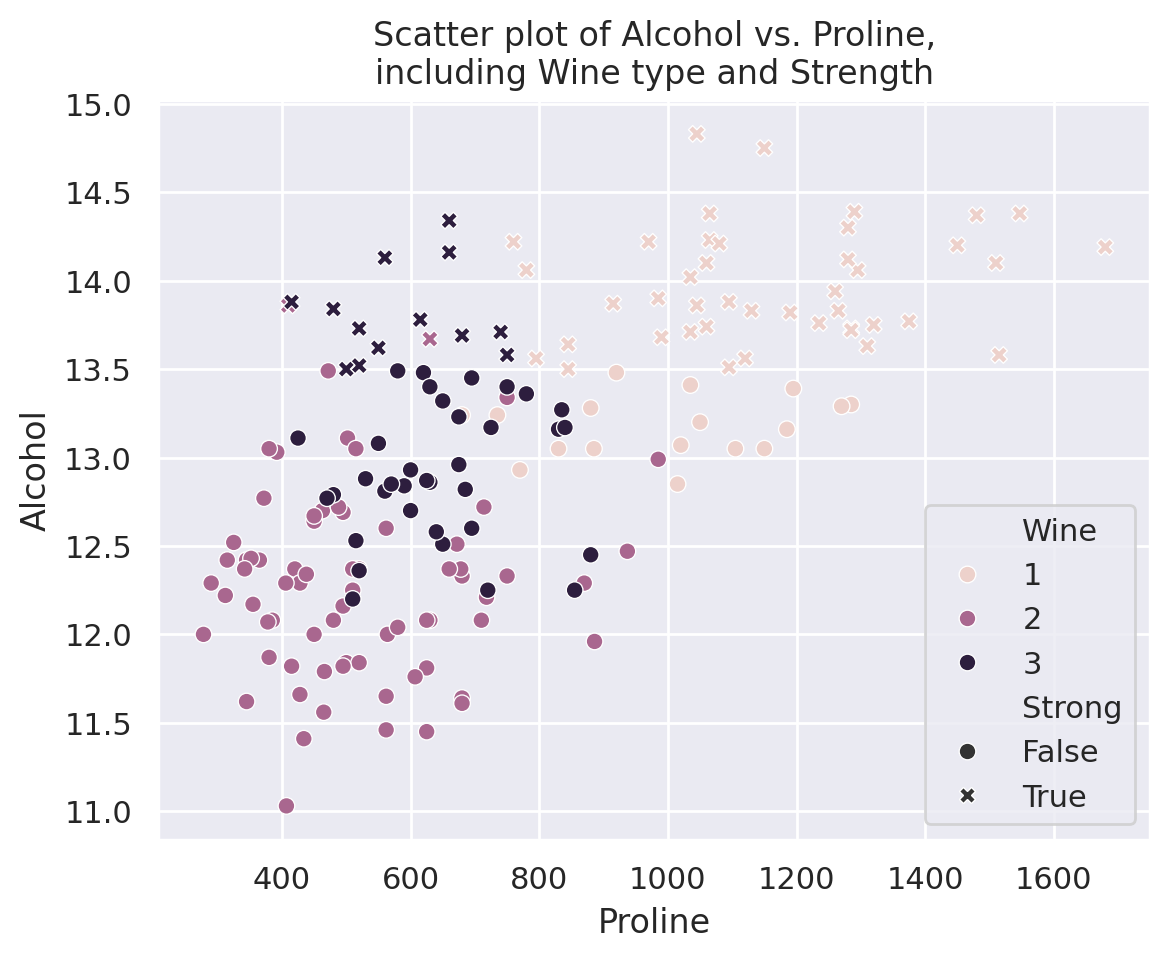

In [ ]:
sns.scatterplot(data=df, x="Proline", y="Alcohol", hue="Wine", style="Strong").set(
    title='Scatter plot of Alcohol vs. Proline,\nincluding Wine type and Strength')

To visualize data when both variables are continuous, we use `sns.lineplot()`. It is recommended to use this over `scatterplot()` when there exists a *temporal relationshop* between x and y.

We use the FMRI dataset for this example, since we don't have temporal relationships in our `wine.csv` dataset. Just to get a sense of it, here is how the FMRI dataset looks:

In [ ]:
fmri = sns.load_dataset('fmri')

In [ ]:
fmri.head(3)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033


[Text(0.5, 1.0, 'Line plot of Signal vs. Timepoint')]

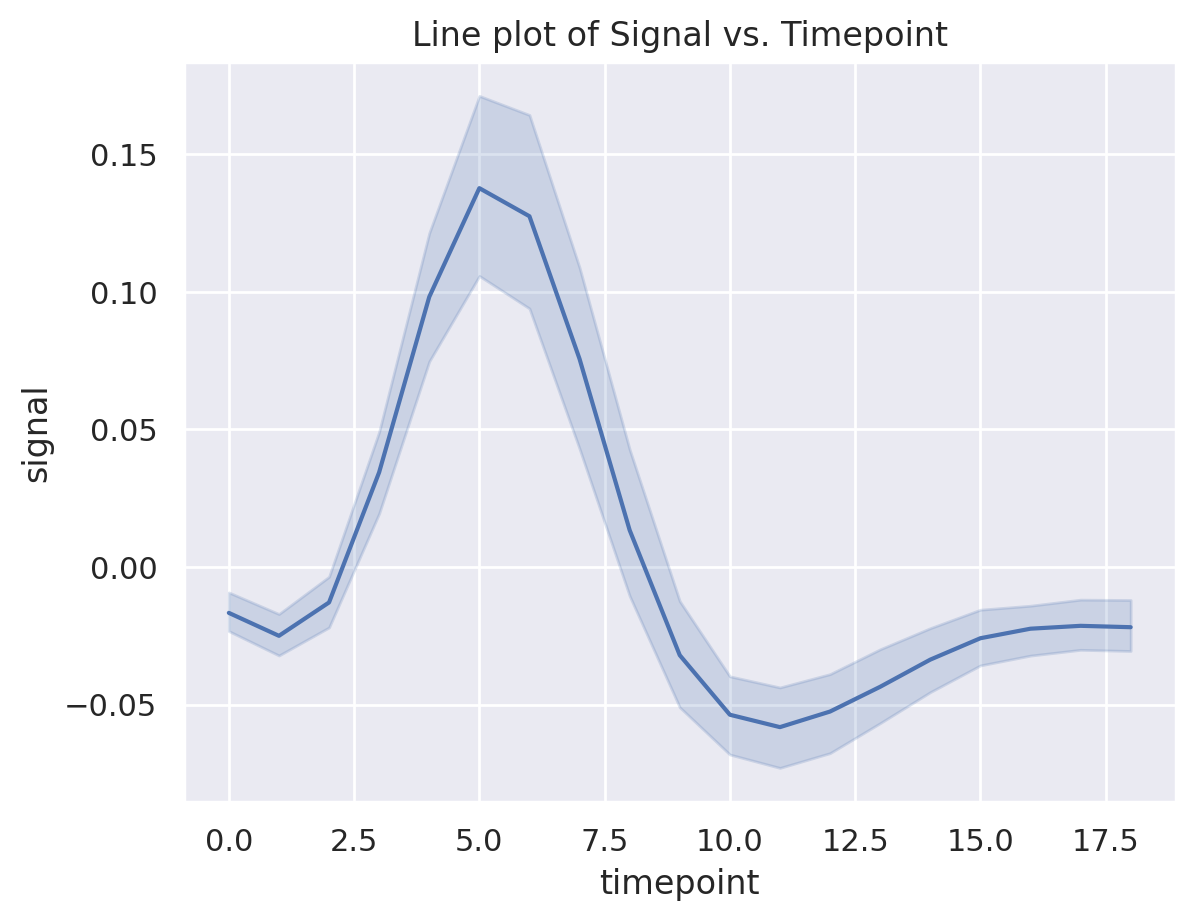

In [ ]:
sns.lineplot(data=fmri, x="timepoint", y="signal").set(title='Line plot of Signal vs. Timepoint')

We can draw even fancier plots by coloring and changing the marker style of categorical variables.

[Text(0.5, 1.0, 'Line plot of Signal vs. Timepoint,\nWith Region and Even categorical variables')]

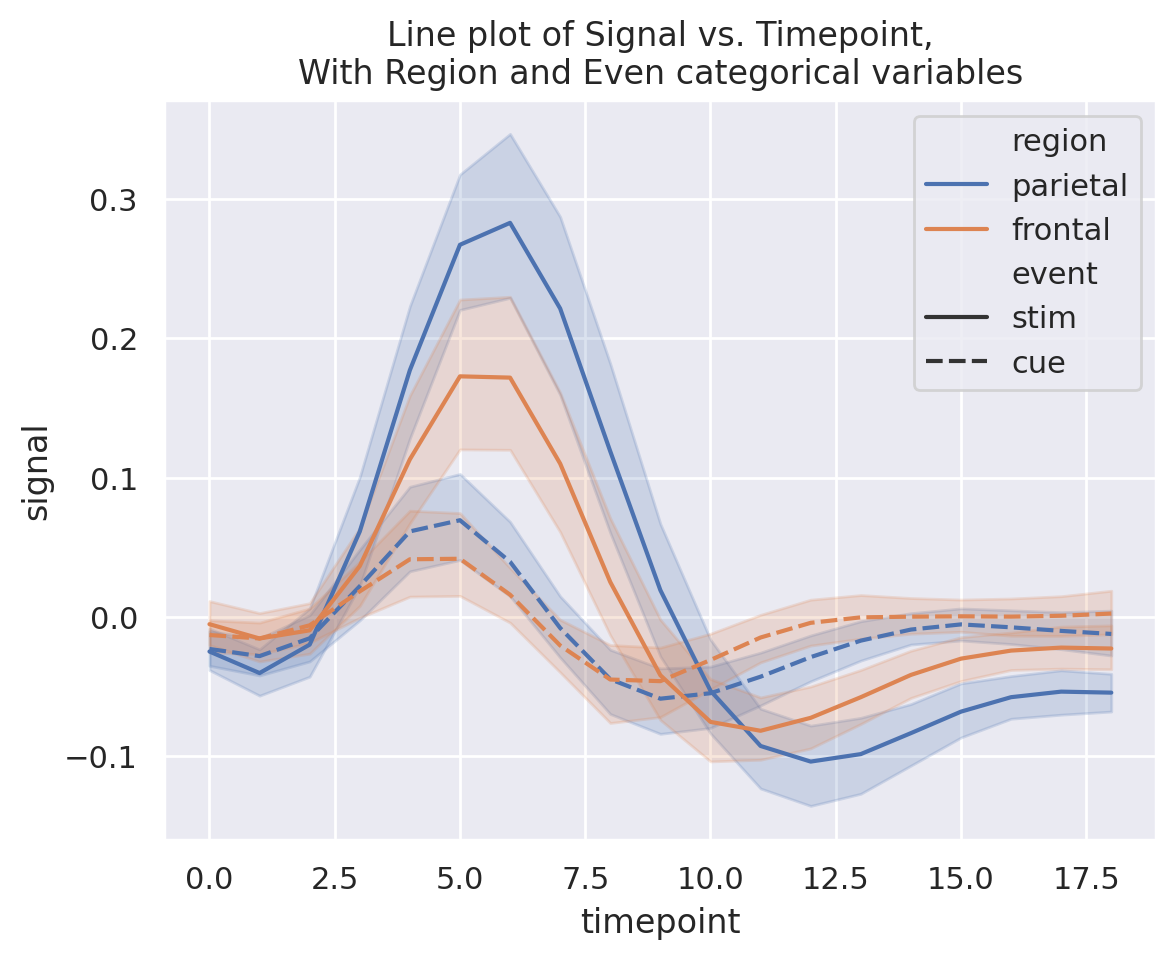

In [ ]:
sns.lineplot(data=fmri, x="timepoint", y="signal", hue="region", style="event").set(
    title='Line plot of Signal vs. Timepoint,\nWith Region and Even categorical variables')

### Matrix plots

To plot rectangular data as a color-encoded matrix, we use the `heatmap()` function.

[Text(0.5, 1.0, 'Correlation matrix between each two variables')]

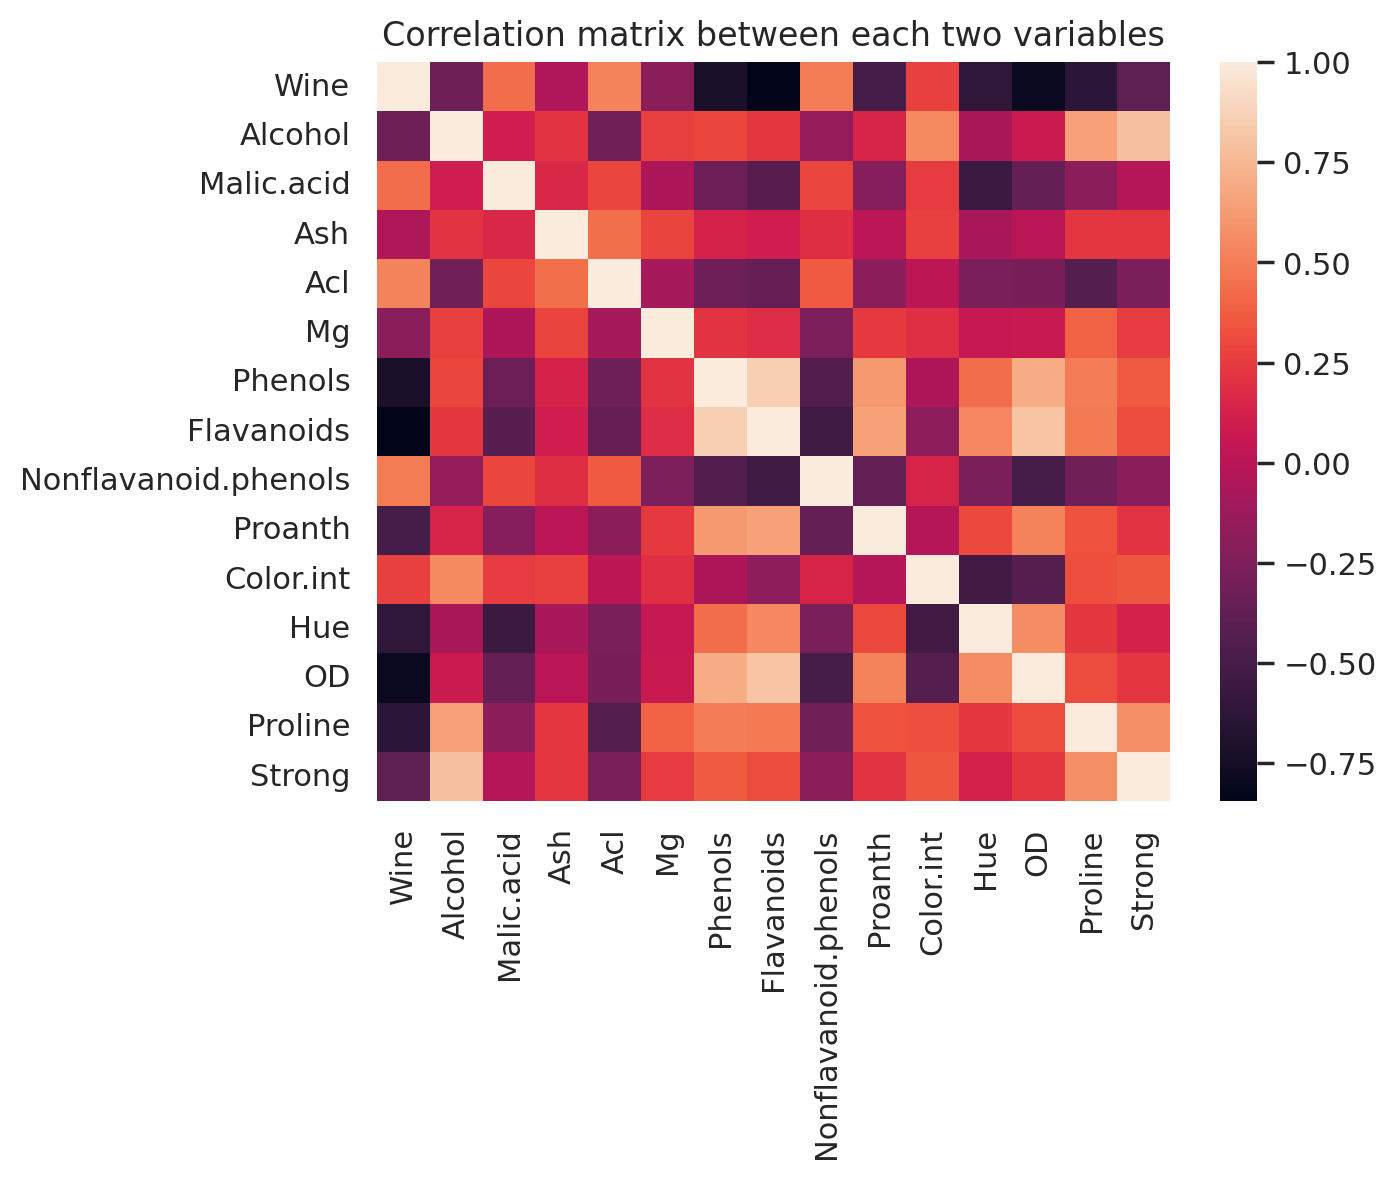

In [ ]:
sns.heatmap(data=df.corr()).set(title='Correlation matrix between each two variables')

We can also add annotations of values by passing the `annot` and format `fmt` parameters.

[Text(0.5, 1.0, 'Correlation matrix between each two variables, annotated')]

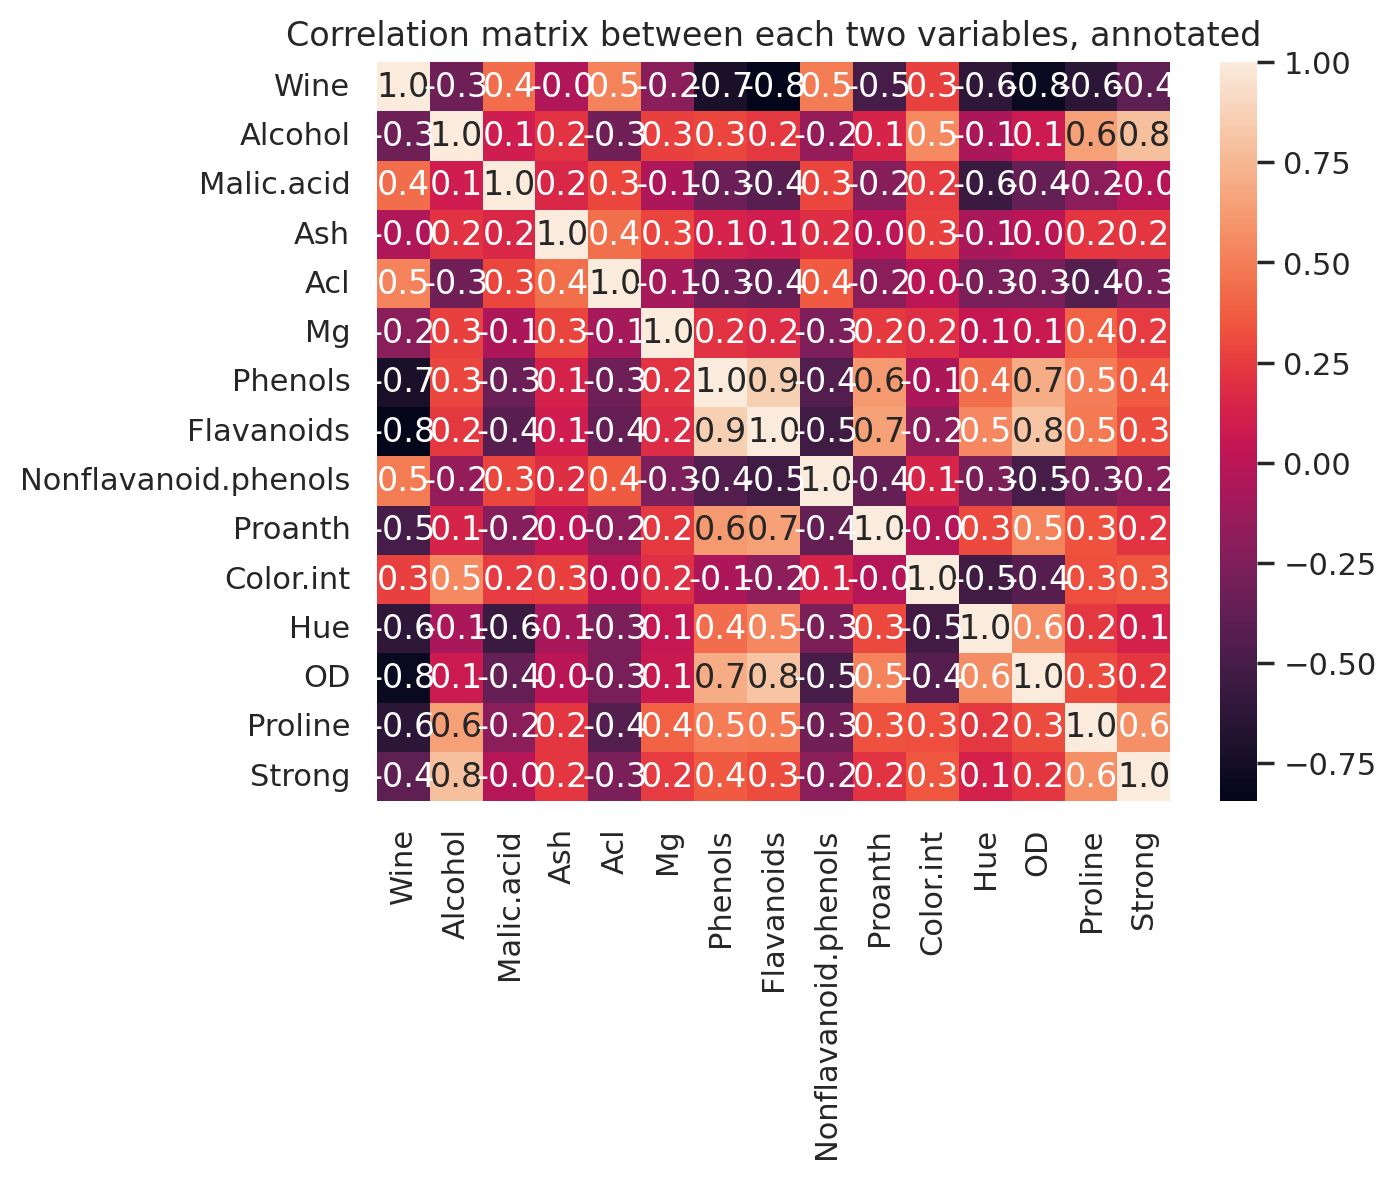

In [ ]:
sns.heatmap(data=df.corr(), annot=True, fmt='.1f').set(
    title='Correlation matrix between each two variables, annotated')

### Grid plots

To plot pairwise relationships in a dataset, we use the `pairplot()` function. This function comes in handy when we just start to explore a dataset and we need to quickly understand basic properties.

By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.

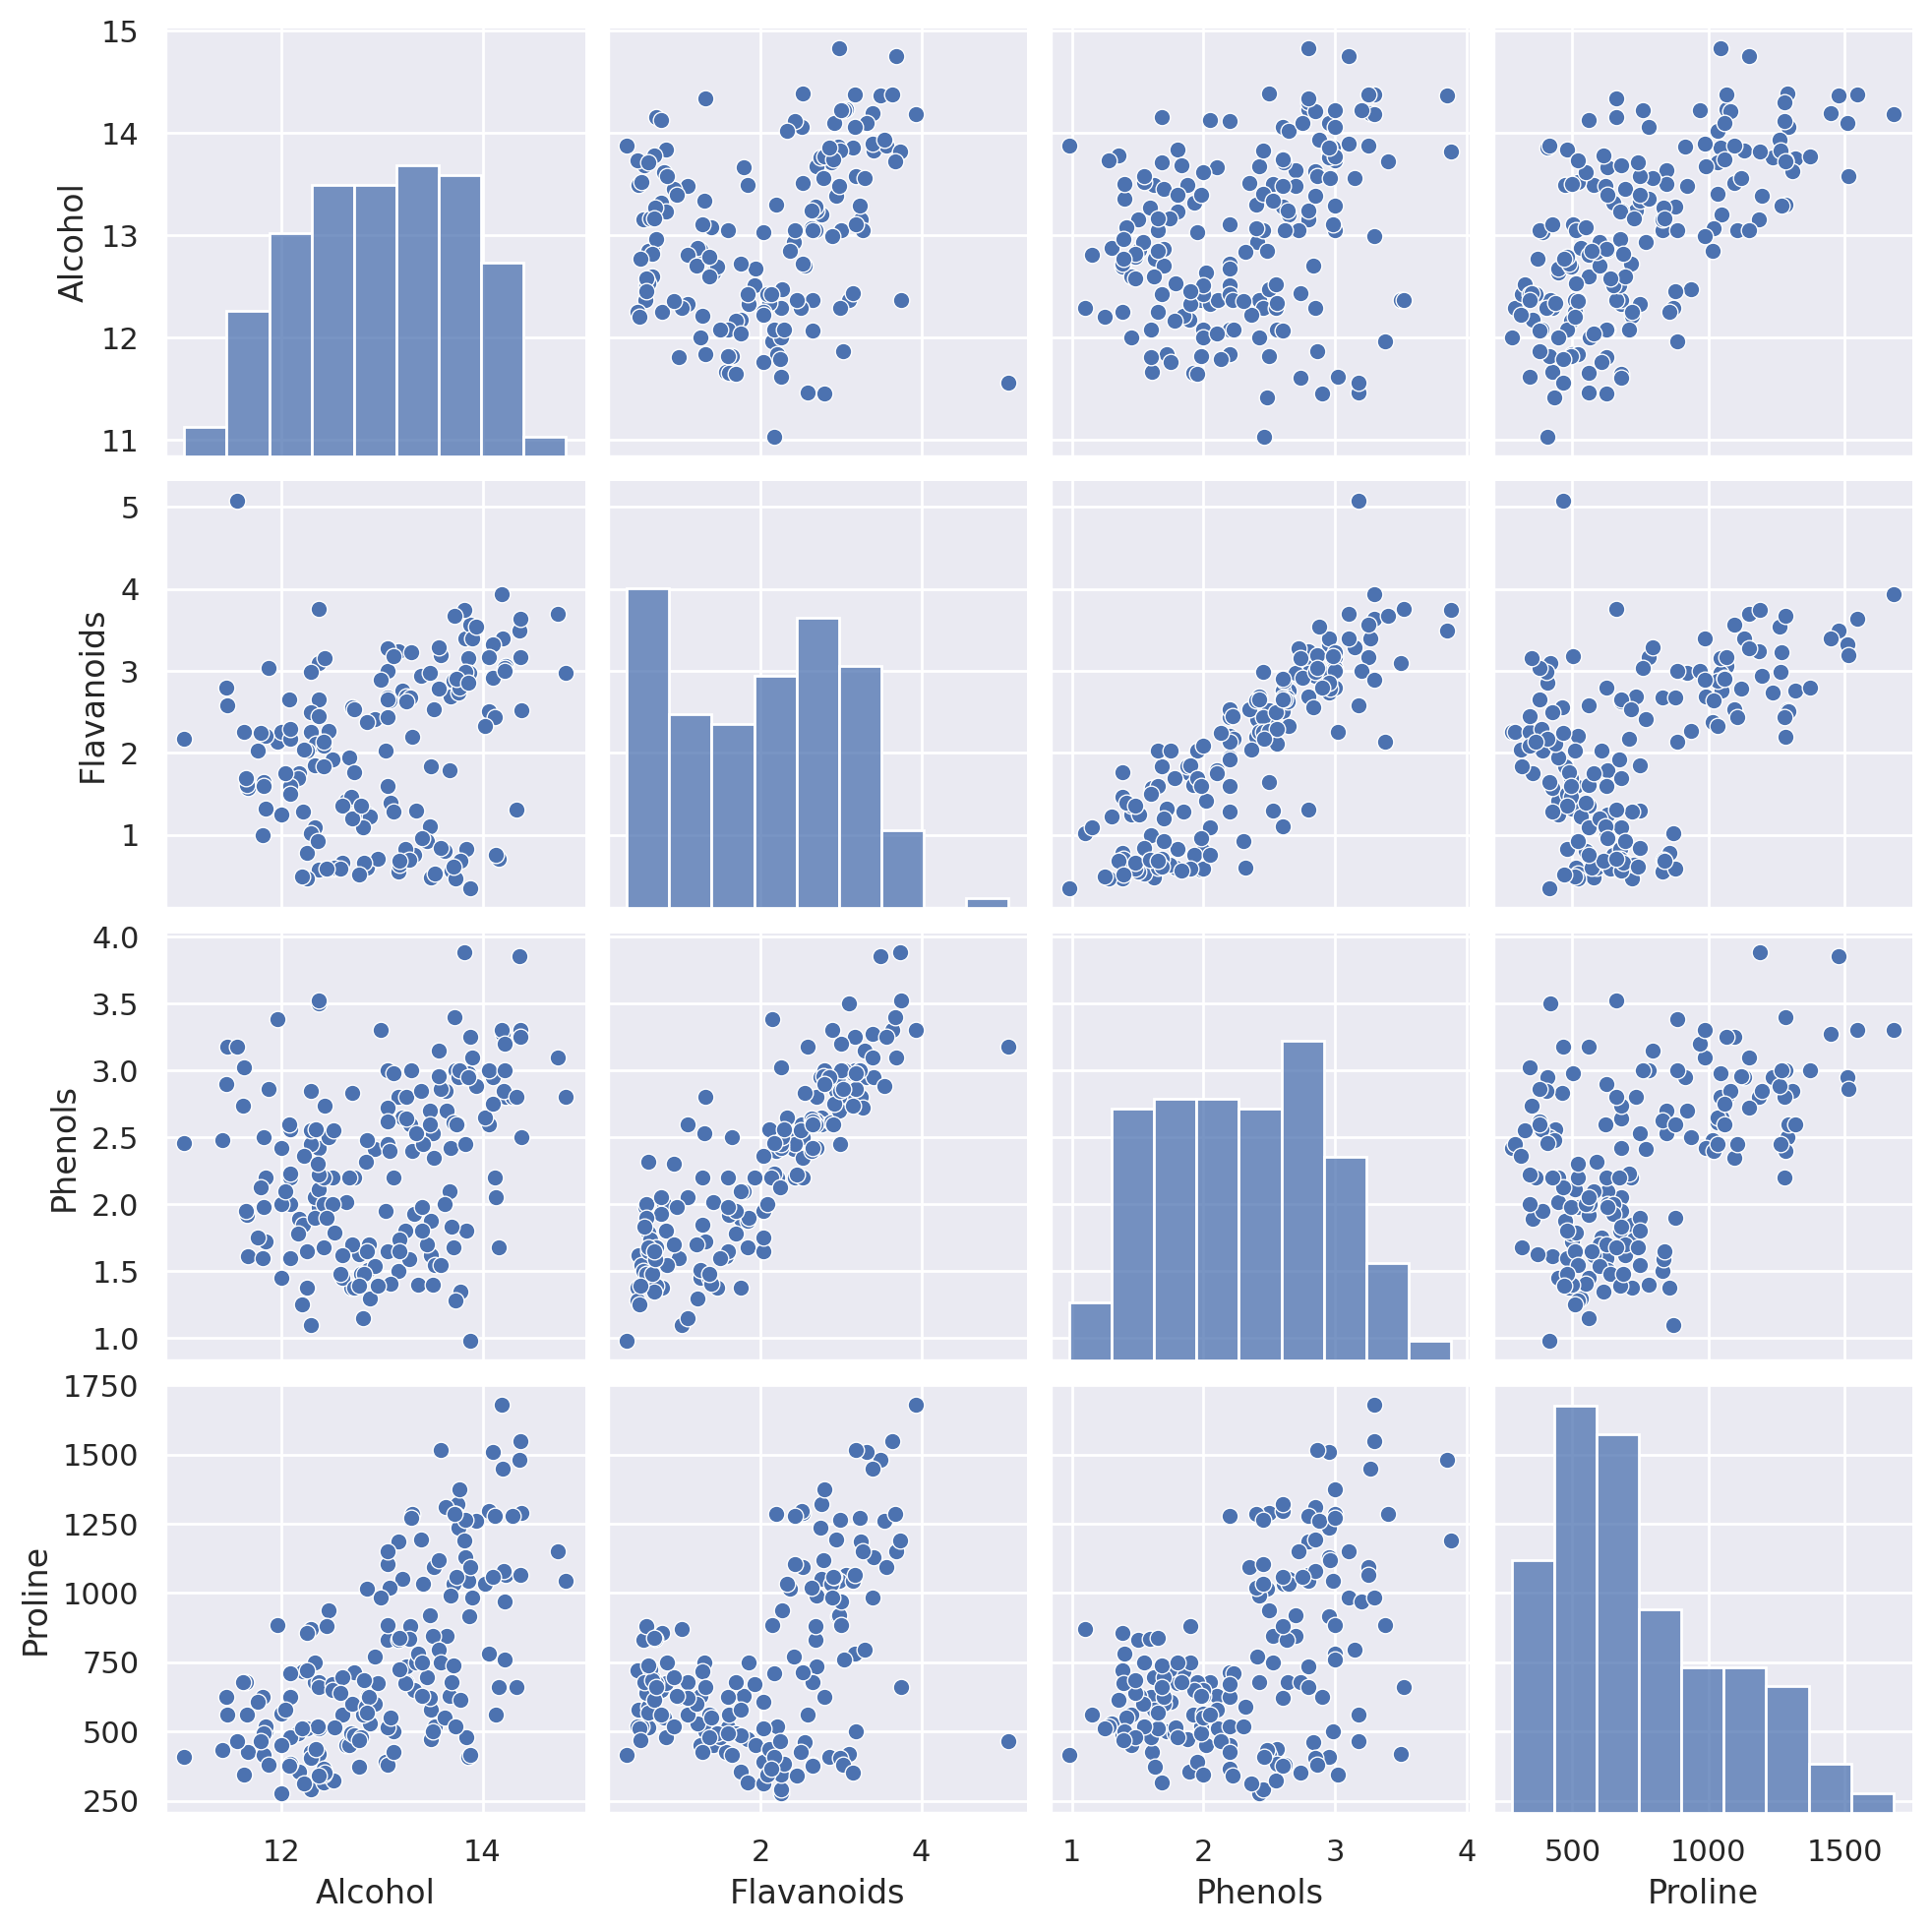

In [ ]:
sns.pairplot(df[['Alcohol', 'Flavanoids', 'Phenols', 'Proline']])

### <mark>Exercises #2</mark>

<mark>Exercise 2.1</mark>

Plot a histogram of **Mg**.

[Text(0.5, 1.0, 'Frequencies of Mg')]

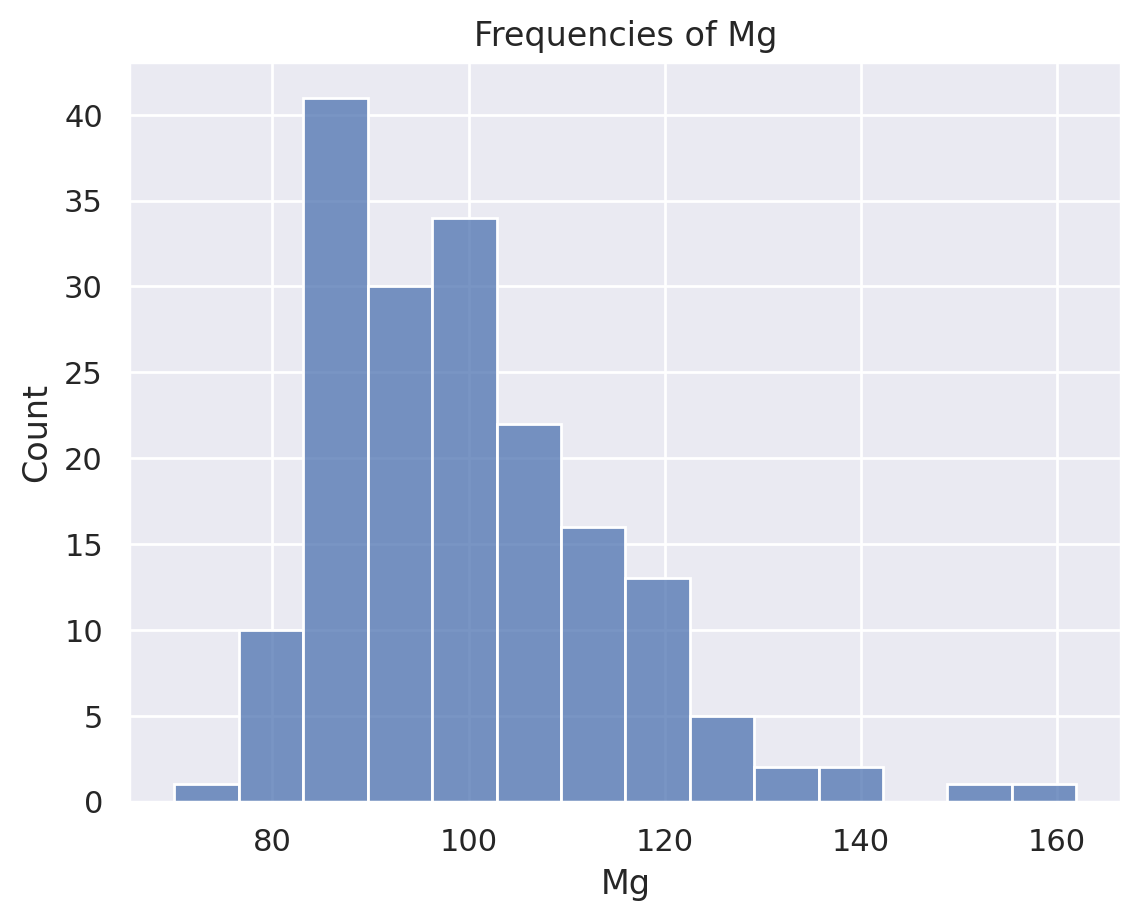

In [ ]:
sns.histplot(data=df, x="Mg").set(title="Frequencies of Mg")

<mark>Exercise 2.2</mark>

Plot a box plot of **Alcohol**.

[Text(0.5, 1.0, 'Spread of Alcohol Percentages')]

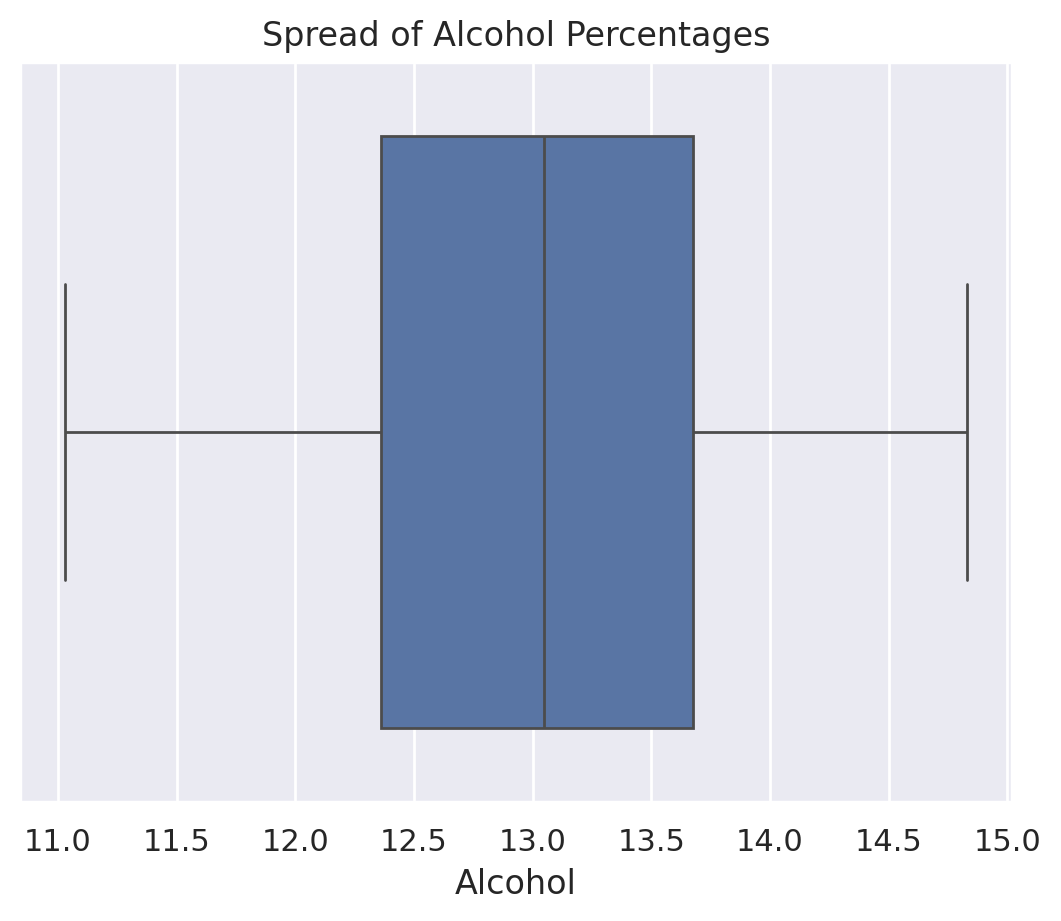

In [ ]:
sns.boxplot(data=df, x="Alcohol").set(title="Spread of Alcohol Percentages")

<mark>Exercise 2.3</mark>

Create a scatter plot of **Flavanoids** vs. **Phenols**, where the color of each marker (point) should represent the type of **Wine**.

[Text(0.5, 1.0, 'Flavanoids vs Phenols')]

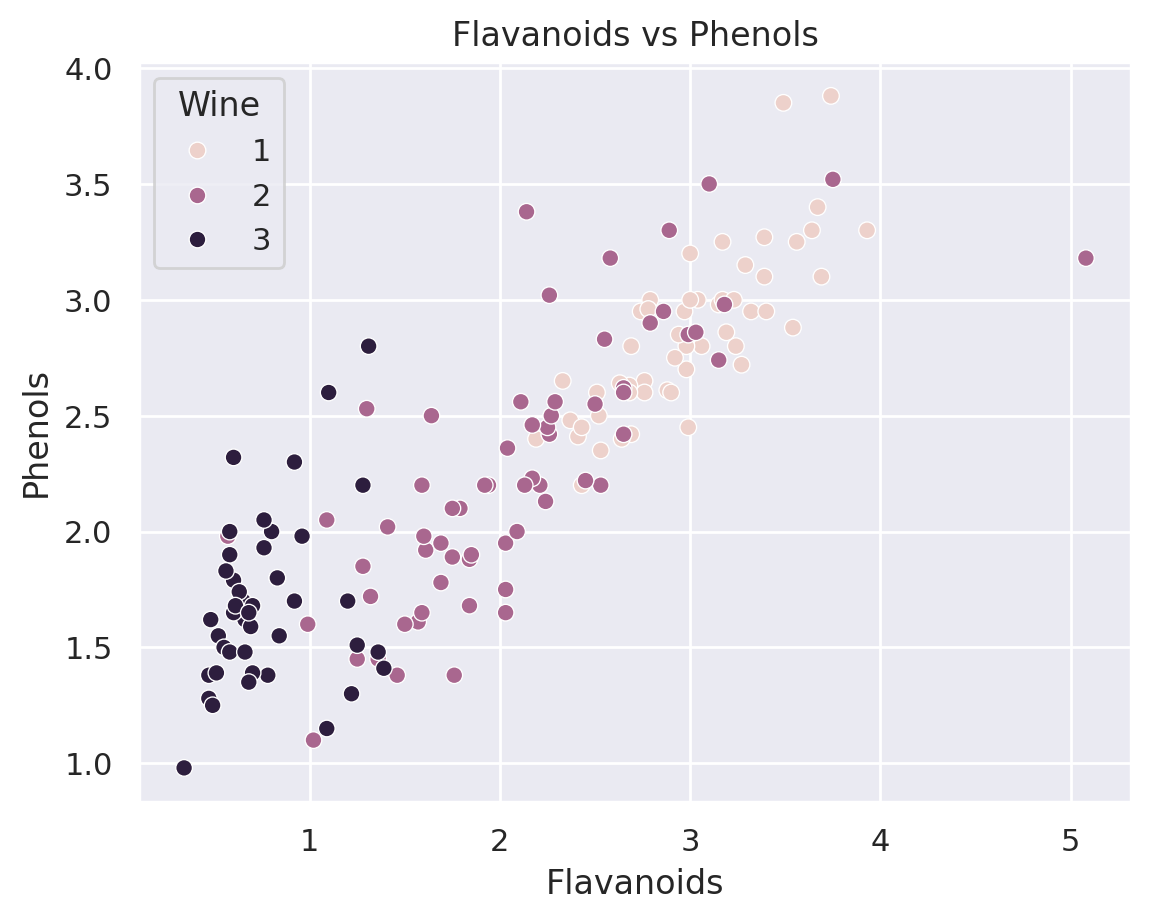

In [ ]:
sns.scatterplot(data=df, x="Flavanoids", y="Phenols", hue="Wine").set(title="Flavanoids vs Phenols")

<mark>Exercise 2.4</mark>

Plot a color-encoded correlation matrix between **Alcohol, Flavanoids, Phenols** and **Proline**.

[Text(0.5, 1.0, 'Correlation')]

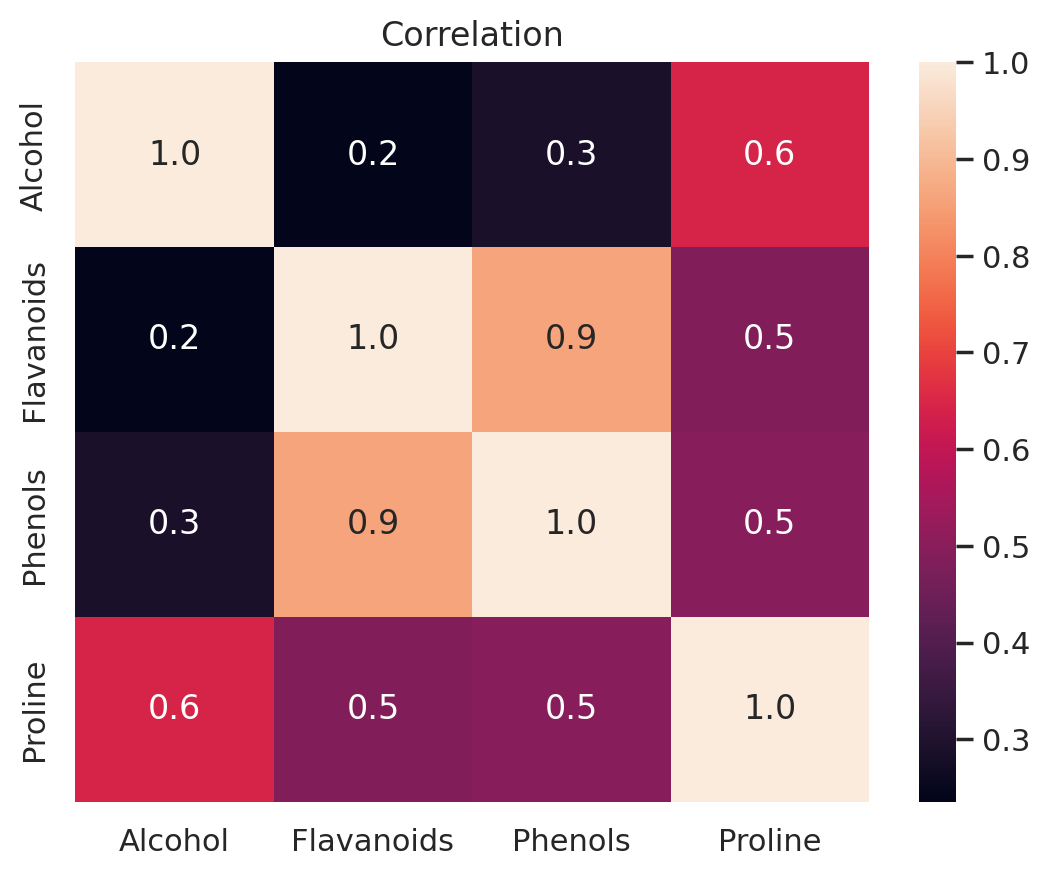

In [ ]:
sns.heatmap(df[["Alcohol", "Flavanoids", "Phenols", "Proline"]].corr(),
            annot=True, fmt=".1f").set(title="Correlation")

## Machine learning - `sklearn`

`scikit-learn` (also known as `sklearn`) is a "machine learning in Python" library. It features various *classification*, *regression* and *clustering* algorithms and designed to interoperate with the Python numerical and scientific libraries `numpy` and `scipy`.

In this section of the notebook we will "get our hands dirty" with the training and evaluation of classifiers from the `sklearn` library. More specifically we will train Logistic Regression and Random Forest classifiers.

### Binary tabular classifier - `SGDClassifier` (Logistic Regression)

**What is the difference between `SGDClassifier` and `LogisticRegressionClassifier`?**

The short answer: For our purpose, it's not important, and we'll mostly use SGDClassifier.

The long answer: These are the same models! However, the optimization for each is different. `LogisticRegressionClassifier` uses the [LBFGS](https://en.wikipedia.org/wiki/Limited-memory_BFGS) optimizer, while the `SGDClassifier` unsurprisingly uses Stochastic Gradient Descent (SGD). As a rule of thumb, if the dataset is bigger, SGD converges faster than LBFGS.

In [ ]:
# preparing the data
from sklearn.model_selection import train_test_split

# to turn this 3 class dataset into a binary dataset, we drop the 3rd class.
df = load_wine_dataset().dropna()
df = df[df['Wine'] != 3]
df['Wine'] = df['Wine'] - 1

# we split the features and the label
train, test = train_test_split(df, random_state=0)

# convert to numpy features and labels
X_train, X_test = train.drop(columns=['Wine']).to_numpy(), test.drop(columns=['Wine']).to_numpy()
y_train, y_test = train['Wine'].to_numpy(), test['Wine'].to_numpy()

In [ ]:
# import
from sklearn.linear_model import SGDClassifier

# instantiate a logistic regression model
# We have to choose a log loss for this model to become logistic regression
# We use a random state so every run would have the exact same trained model
clf = SGDClassifier(loss='log', random_state=3)


# training: fit a model to the training data
clf.fit(X_train, y_train)

# inference: predict the train and test classes
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_test_score = clf.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [ ]:
# evaluation imports
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

# train and test accuracy
print(f'Logistic regression train accuracy: {accuracy_score(y_pred=y_train_pred, y_true=y_train) * 100:.2f}%')
print(f'Logistic regression test accuracy: {accuracy_score(y_pred=y_test_pred, y_true=y_test) * 100:.2f}%')

Logistic regression train accuracy: 75.26%
Logistic regression test accuracy: 78.79%


[Text(0.5, 1.0, 'Test set confusion matrix'),
 Text(0.5, 19.049999999999997, 'predicted label'),
 Text(46.25, 0.5, 'true label')]

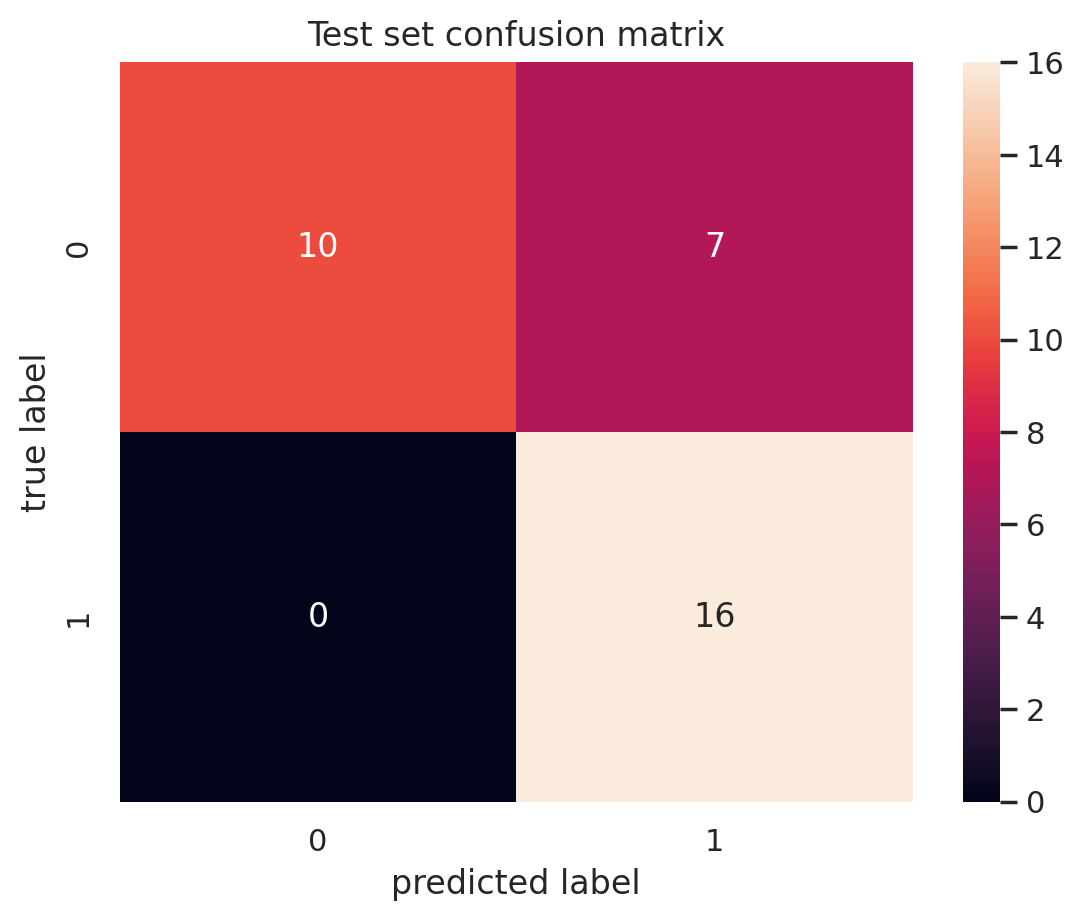

In [ ]:
# confusion matrix
sns.heatmap(confusion_matrix(y_pred=y_test_pred, y_true=y_test), annot=True, fmt='d').set(
    title='Test set confusion matrix', xlabel='predicted label', ylabel='true label')

[Text(0.5, 1.0, 'ROC Curve\nArea under curve: 0.79')]

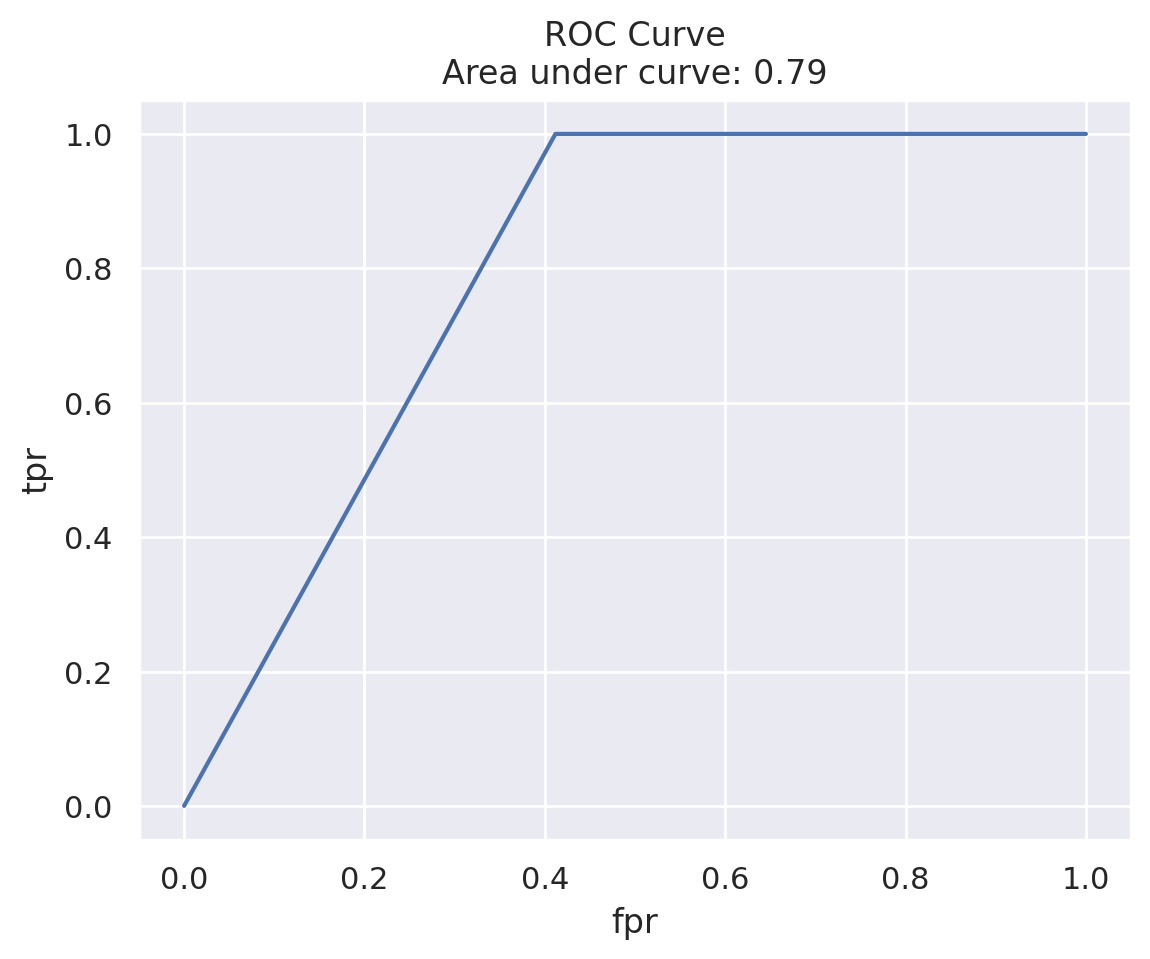

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_score)
roc_df = pd.DataFrame.from_dict(dict(fpr=fpr, tpr=tpr))
auc = roc_auc_score(y_test, y_test_score)
sns.lineplot(data=roc_df, x='fpr', y='tpr').set(title=f'ROC Curve\nArea under curve: {auc:.2f}')

### Multiclass tabular classifier - `RandomForestClassifier`

To explain what is a random forest, we first have to explain what is a decision tree. After all, forests have no meaning without trees, right?

**Decision Trees** are a supervised learning method used for classification (and regression). The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

Here is a visualized example of a decision tree:
![DT](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_dtc_002.png)

A **random forest** is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. In random forests, each tree in the ensemble is built from a sample drawn with replacement (i.e., a [bootstrap sample](https://en.wikipedia.org/wiki/Bootstrapping_(statistics))) from the training set.

In [ ]:
from sklearn.model_selection import train_test_split

# load the data
df = load_wine_dataset().drop(columns=['Strong']).dropna()

# split to train and test
train, test = train_test_split(df)

# convert to numpy features and labels
X_train, X_test = train.drop(columns=['Wine']).to_numpy(), test.drop(columns=['Wine']).to_numpy()
y_train, y_test = train['Wine'].to_numpy(), test['Wine'].to_numpy()

In [ ]:
# import
from sklearn.ensemble import RandomForestClassifier

# instantiate a RandomForestClassifier model
clf = RandomForestClassifier()

# training: fit a model to the training data
clf.fit(X_train, y_train)

# inference: predict the train and test classes
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_test_score = clf.predict_proba(X_test)

In [ ]:
# evaluation imports
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

### <mark>Exercises #3</mark>

<mark>Exercise 3.1</mark>

Using `sklearn`, compute the **train and test accuracy** of the Random Forest classifier.

In [ ]:
# train and test accuracy
print(f'Random Forest train accuracy: {accuracy_score(y_pred=y_train_pred, y_true=y_train) * 100:.2f}%')
print(f'Random Forest test accuracy: {accuracy_score(y_pred=y_test_pred, y_true=y_test) * 100:.2f}%')

Random Forest train accuracy: 100.00%
Random Forest test accuracy: 97.78%


<mark>Exercise 3.2</mark>

Using `sklearn` and `seaborn`, plot a **confusion matrix** of the Random Forest classifier.

[Text(0.5, 1.0, 'Test set confusion matrix'),
 Text(0.5, 19.049999999999997, 'predicted label'),
 Text(46.25, 0.5, 'true label')]

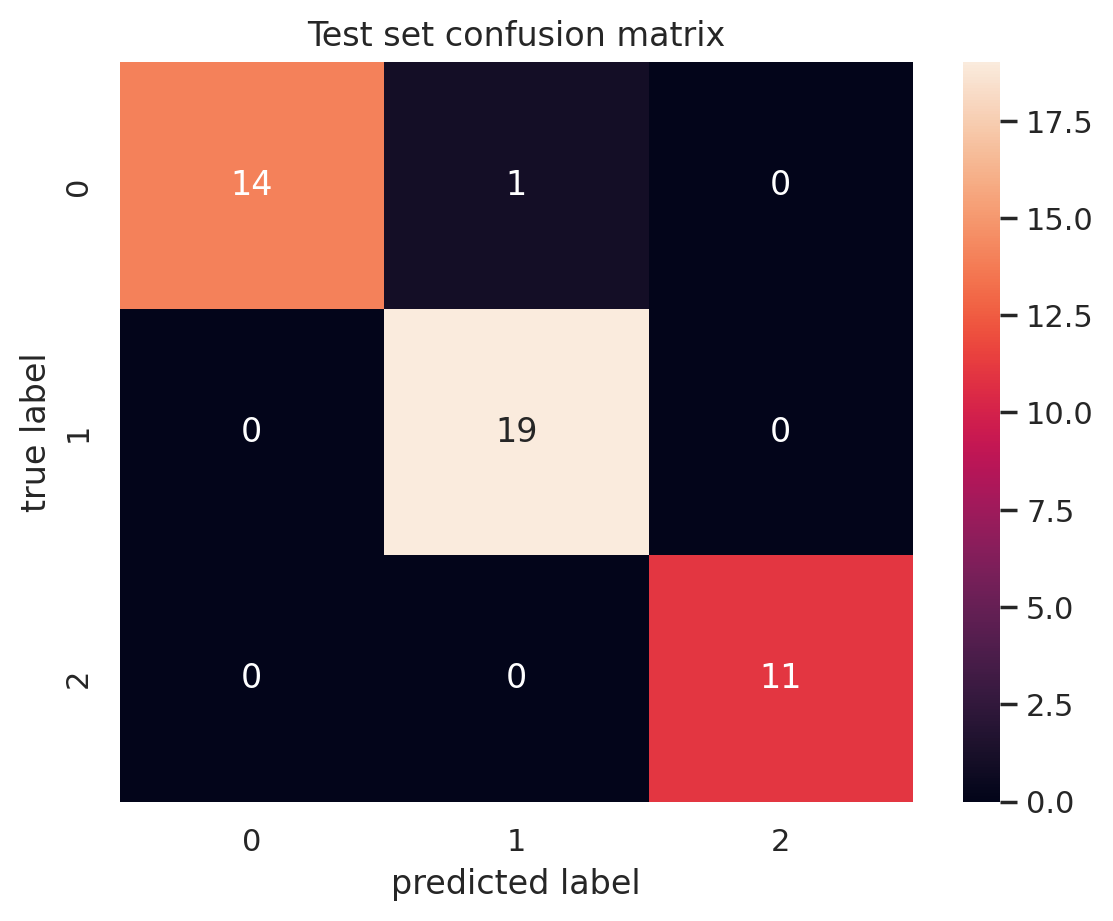

In [ ]:
sns.heatmap(confusion_matrix(y_pred=y_test_pred, y_true=y_test), annot=True, fmt='d').set(
    title='Test set confusion matrix', xlabel='predicted label', ylabel='true label')

<mark>Exercise 3.3</mark>

Using `sklearn` and `seaborn`, plot a **ROC Curve** and compute the **AUC (area-under-curve)** of the Random Forest classifier.

In [ ]:
np.unique(y_test, return_counts=True)

(array([1, 2, 3]), array([15, 19, 11]))

In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

[Text(0.5, 1.0, 'ROC Curve\nArea under curve: 1.00')]

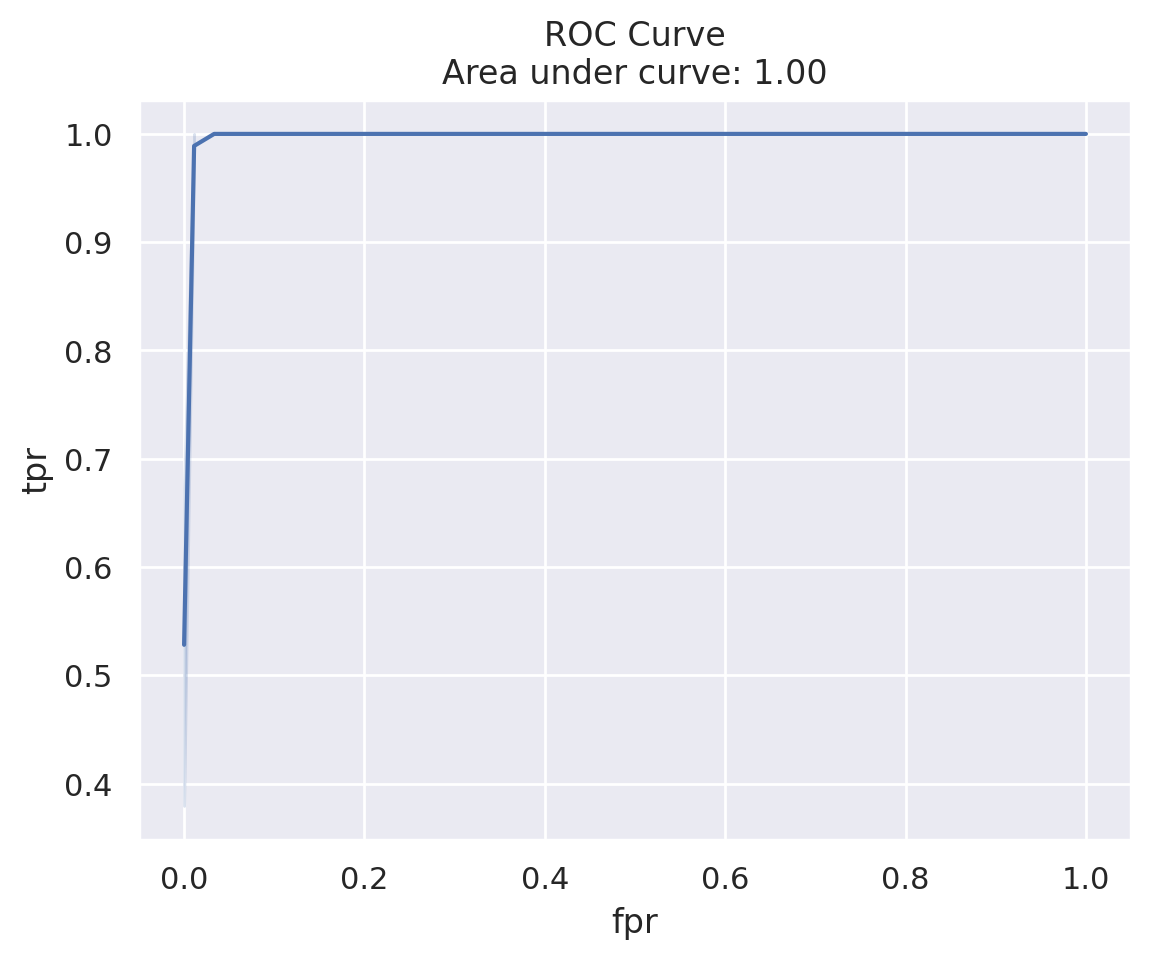

In [ ]:
fpr, tpr, _ = roc_curve(y_onehot_test.ravel(), y_test_score.ravel())
roc_df = pd.DataFrame.from_dict(dict(fpr=fpr, tpr=tpr))
auc = roc_auc_score(y_test, y_test_score, multi_class="ovr", average="micro") # use micro avg because of class-imbalance
sns.lineplot(data=roc_df, x='fpr', y='tpr').set(title=f'ROC Curve\nArea under curve: {auc:.2f}')

### Text (NLP) classifier - `SGDClassifier` (TF.IDF Logistic Regression)

Loading dataset containing first five categories

In [ ]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups(
    subset="train",
    categories=[
        "alt.atheism",
        "comp.graphics",
        "comp.os.ms-windows.misc",
        "comp.sys.ibm.pc.hardware",
        "comp.sys.mac.hardware",
    ],
)

corpus = pd.DataFrame.from_dict(dict(text=data.data, label=data.target))

Take a look at the data

In [ ]:
corpus

,text,label
0,From: hades@coos.dartmouth.edu (Brian V. Hughe...,4
1,From: gtonwu@Uz.nthu.edu.tw (Tony G. Wu)\nSubj...,2
2,From: glang@slee01.srl.ford.com (Gordon Lang)\...,3
3,From: edm@twisto.compaq.com (Ed McCreary)\nSub...,0
4,From: pmhudepo@cs.vu.nl (Hudepohl PMJ)\nSubjec...,2
...,...,...
2818,From: marshall@csugrad.cs.vt.edu (Kevin Marsha...,0
2819,From: scrowe@hemel.bull.co.uk (Simon Crowe)\nS...,1
2820,From: jap10@po.CWRU.Edu (Joseph A. Pellettiere...,4
2821,From: jbalgley@bbn.com (Jon Balgley)\nSubject:...,1


Split to train and test sets.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(corpus['text'], corpus['label'])

Build TF-IDF features

* `CountVectorizer` converts a collection of text documents to a matrix of token counts.
* `TfidfTransformer` transforms a count matrix to a normalized tf or tf-idf representation.

For further reading about tokenizers, count features extraction and TF-IDF, visit [this link](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction).

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

vectorizer = CountVectorizer()
tfidf = TfidfTransformer()

X_train_tfidf = tfidf.fit_transform(vectorizer.fit_transform(X_train))
X_test_tfidf = tfidf.transform(vectorizer.transform(X_test))

### <mark>Exercises #3 (continued)</mark>

<mark>Exercise 3.4</mark>

Load and fit a linear regression, `SGDClassifier`, model.

In [ ]:
clf = SGDClassifier()
clf.fit(X_train_tfidf, y_train)

SGDClassifier()

<mark>Exercise 3.5</mark>

Predict the labels for the train and test sets.

* `y_train_pred = `
* `y_test_pred = `

In [ ]:
y_train_pred = clf.predict(X_train_tfidf)
y_test_pred = clf.predict(X_test_tfidf)

Evaluation (uncomment and run)

[Text(0.5, 1.0, 'Test set confusion matrix'),
 Text(0.5, 19.049999999999997, 'predicted label'),
 Text(46.25, 0.5, 'true label')]

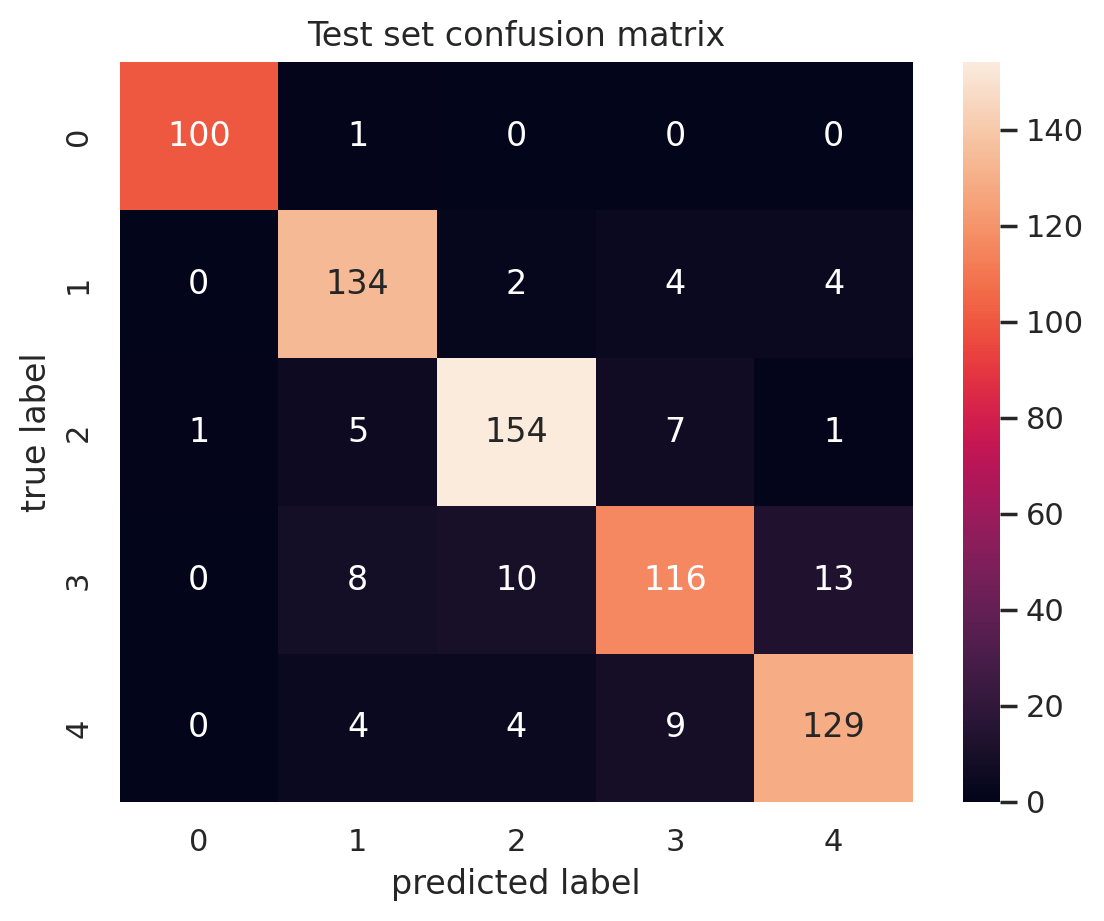

In [ ]:
# # confusion matrix
sns.heatmap(confusion_matrix(y_pred=y_test_pred, y_true=y_test), annot=True, fmt='d').set(
    title='Test set confusion matrix', xlabel='predicted label', ylabel='true label')

### Image classifier - `VGG11`

* `torch` is the import for PyTorch, an optimized tensor library for deep learning using GPUs and CPUs.
* `torchvision` is a part of the PyTorch project. It consists of popular datasets, model architectures, and common image transformations for computer vision.

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from tqdm.notebook import tqdm  # for creating beautiful loading bars

First, we start by getting the data and creating a dataloader iterator. The dataset we will be using is the **CIFAR-10** dataset.

The CIFAR-10 is a labeled subset of the 80 million tiny images dataset. They were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton. It consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

Here are the classes in the dataset, as well as 10 random images from each:

![CIFAR10](https://pytorch.org/tutorials/_images/cifar10.png)

In [ ]:
# download and preprocess data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2471, 0.2435, 0.2616))
])
test_data = CIFAR10('data', train=False, transform=transform, download=True)  # 340MB download
test_loader = torch.utils.data.DataLoader(test_data)

Files already downloaded and verified


We continue by loading a pretrained convolutional image classification model, VGG11. This model is one of the most common baselines used in computer vision. It was first introduced in the paper “[Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556)”. The original implementation and pretraining on CIFAR10 can be found [here](https://github.com/chenyaofo/pytorch-cifar-models).

In [ ]:
model = torch.hub.load("chenyaofo/pytorch-cifar-models", "cifar10_vgg11_bn", pretrained=True)

Using cache found in /root/.cache/torch/hub/chenyaofo_pytorch-cifar-models_master


In [ ]:
# move model to GPU if cuda is available 😊
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace=True)
    (14): MaxPool2d(ke

Run inference on the entire dataset

In [ ]:
true_labels, predicted_labels = [], []

with torch.no_grad():
    for image, true_label in tqdm(test_loader):
        # true label
        true_labels.append(true_label.item())

        # predicted label
        model_output = model(image.to(device))  # feed the model with the image
        predicted_class = torch.argmax(model_output, dim=1)  # the output class with the highest score is our prediction
        predicted_labels.append(predicted_class.cpu().item())

  0%|          | 0/10000 [00:00<?, ?it/s]

Compute evaluation metrics (which we are already familiar with!).

In [ ]:
acc = accuracy_score(y_true=true_labels, y_pred=predicted_labels)
cm = confusion_matrix(y_true=true_labels, y_pred=predicted_labels)  # sklearn confusion matrix
cm = pd.DataFrame.from_records(cm, columns=test_data.classes)  # organize it in a neat dataframe
cm.index = test_data.classes

Visualize computed confusion matrix

[Text(0.5, 1.0, 'Confusion Matrix of CIFAR-10 Test Set\nAccuracy: 49.35%'),
 Text(0.5, 19.049999999999997, 'predicted'),
 Text(46.24999999999999, 0.5, 'true')]

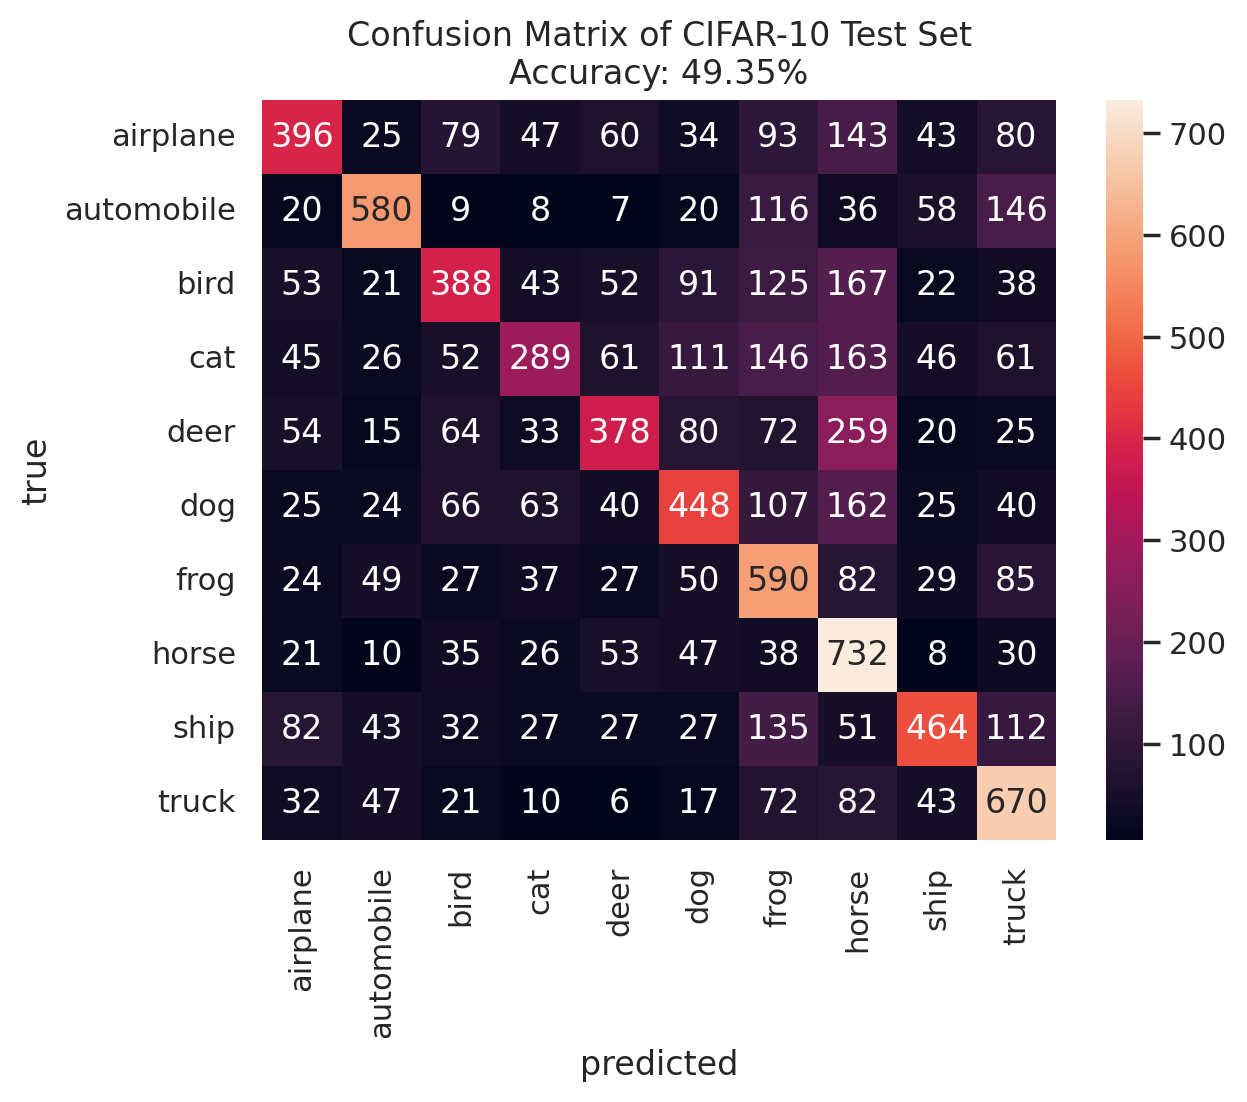

In [ ]:
sns.heatmap(cm, annot=True, fmt='d').set(title=f'Confusion Matrix of CIFAR-10 Test Set\nAccuracy: {acc * 100:.2f}%',
                    xlabel='predicted', ylabel='true')  # viz

### <mark>Bonus Exercise</mark>

Train a better model than the one we use here.\*

\*You first need to define the concept of *better* in your words. For example: "In this exercise, we consider models that achieve higher accuracy scores as better models". You can perform your evaluation based on suitable metrics (hint: they all appear in this notebook).

For the purposes of this exercise, I will consider a "better model" as a model that achieves a higher accuracy (which can be misleading at times when there are large class imbalances). This improved performance can possibly be achieved by utilizing residual networks. I will be using a smaller (lowest number of parameters) ResNet variant, ResNet20.

In [ ]:
model = torch.hub.load('chenyaofo/pytorch-cifar-models', 'cifar10_resnet20', pretrained=True)
# move model to GPU if cuda is available 😊
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
model.eval()

Using cache found in /root/.cache/torch/hub/chenyaofo_pytorch-cifar-models_master


CifarResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias

In [ ]:
true_labels, predicted_labels = [], []

with torch.no_grad():
    for image, true_label in tqdm(test_loader):
        # true label
        true_labels.append(true_label.item())

        # predicted label
        model_output = model(image.to(device))  # feed the model with the image
        predicted_class = torch.argmax(model_output, dim=1)  # the output class with the highest score is our prediction
        predicted_labels.append(predicted_class.cpu().item())

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
acc = accuracy_score(y_true=true_labels, y_pred=predicted_labels)
cm = confusion_matrix(y_true=true_labels, y_pred=predicted_labels)  # sklearn confusion matrix
cm = pd.DataFrame.from_records(cm, columns=test_data.classes)  # organize it in a neat dataframe
cm.index = test_data.classes

[Text(0.5, 1.0, 'Confusion Matrix of CIFAR-10 Test Set\nAccuracy: 92.11%'),
 Text(0.5, 19.049999999999997, 'predicted'),
 Text(46.24999999999999, 0.5, 'true')]

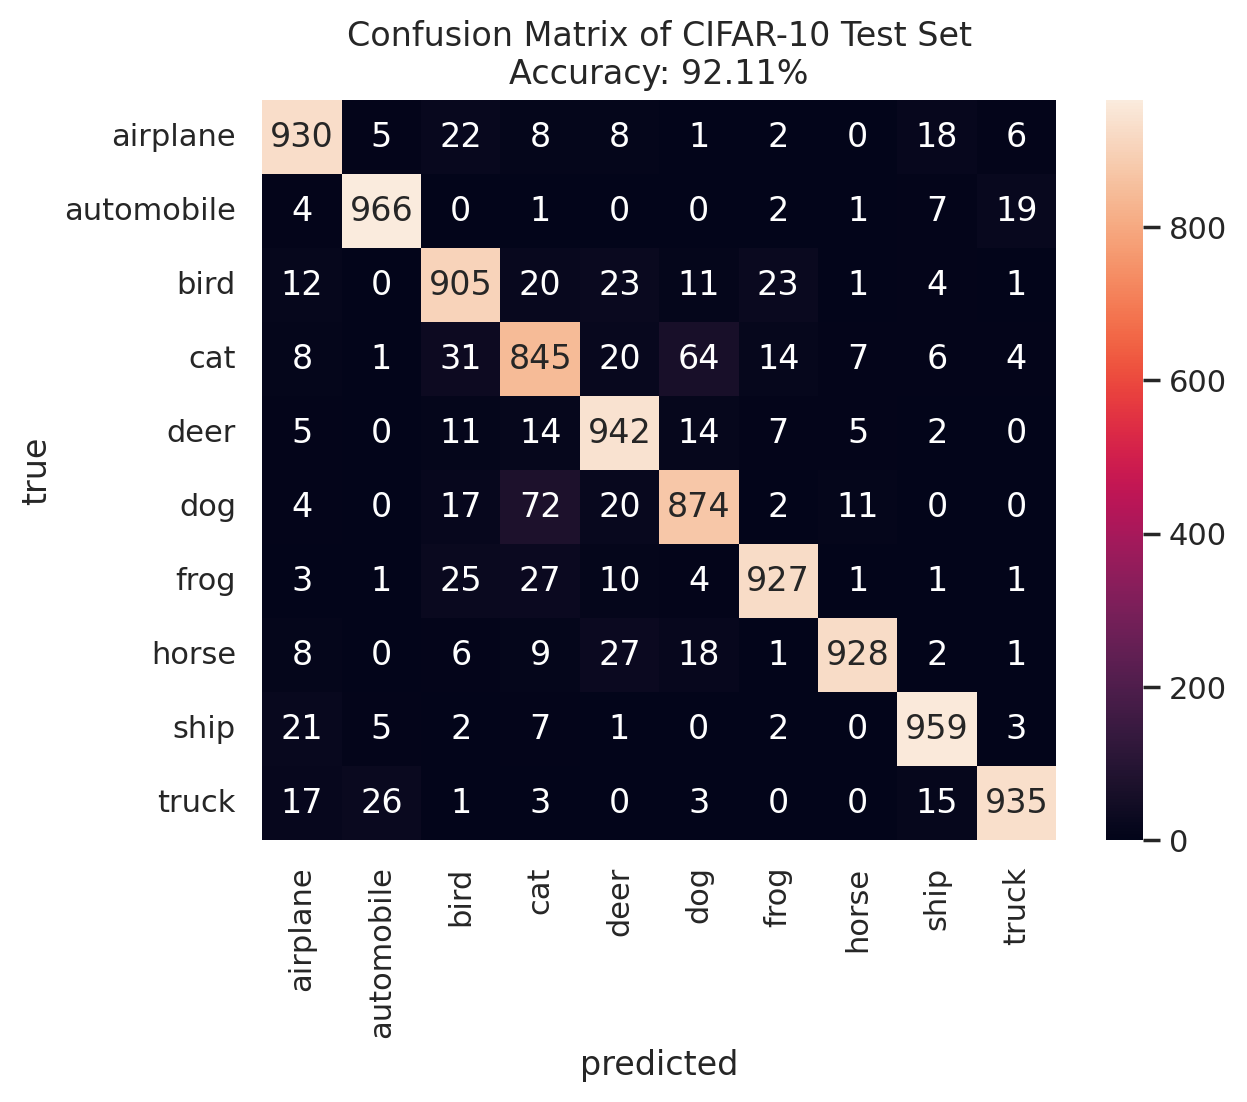

In [ ]:
sns.heatmap(cm, annot=True, fmt='d').set(title=f'Confusion Matrix of CIFAR-10 Test Set\nAccuracy: {acc * 100:.2f}%',
                    xlabel='predicted', ylabel='true')  # viz

## That's all!

If you found a mistake / problem in this notebook, or something was unclear, please post at the `#ds` channel.

### Submission

1. Save the notebook as a pdf file (In Colab: File > Print)
2. Upload in Gradescope http://go.responsibly.ai/gradescope
